<h1 style="text-align: center; font-weight: bold;">Narges Mohammadi Elyasi </h1>
<h1 style="text-align: center"> 810100258</h1>
<h1 style="text-align: center;">CA4 - Machine Learning</h1>

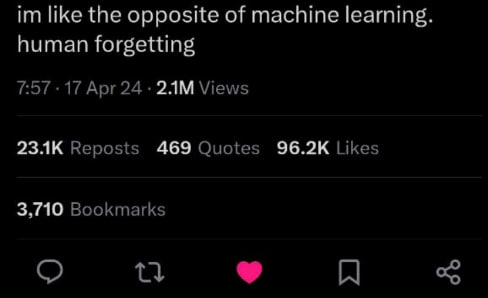

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import  recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from copy import deepcopy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
import pandas as pd
from seaborn import heatmap, diverging_palette
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

FILE_NAME = "/content/drive/MyDrive/Colab Notebooks/DataSet.xlsx"

## EDA

### Q1: Info and Describe

In [3]:
df = pd.read_excel(FILE_NAME)
pd.set_option("display.max_columns", None)
df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


### Q3: Unique Values of Features

In [5]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    nan_values_count = df.isna().sum()
    nan_values_percent = nan_values_count / len(df)
    nan_values = pd.concat([nan_values_count, nan_values_percent], axis=1, keys=["Missing", "Percentage"])
    return nan_values


missing_values(df)

,Missing,Percentage
CRIM,0,0.000000
ZN,0,0.000000
INDUS,0,0.000000
CHAS,26,0.051383
NOX,0,0.000000
RM,0,0.000000
AGE,0,0.000000
DIS,27,0.053360
RAD,0,0.000000
TAX,0,0.000000


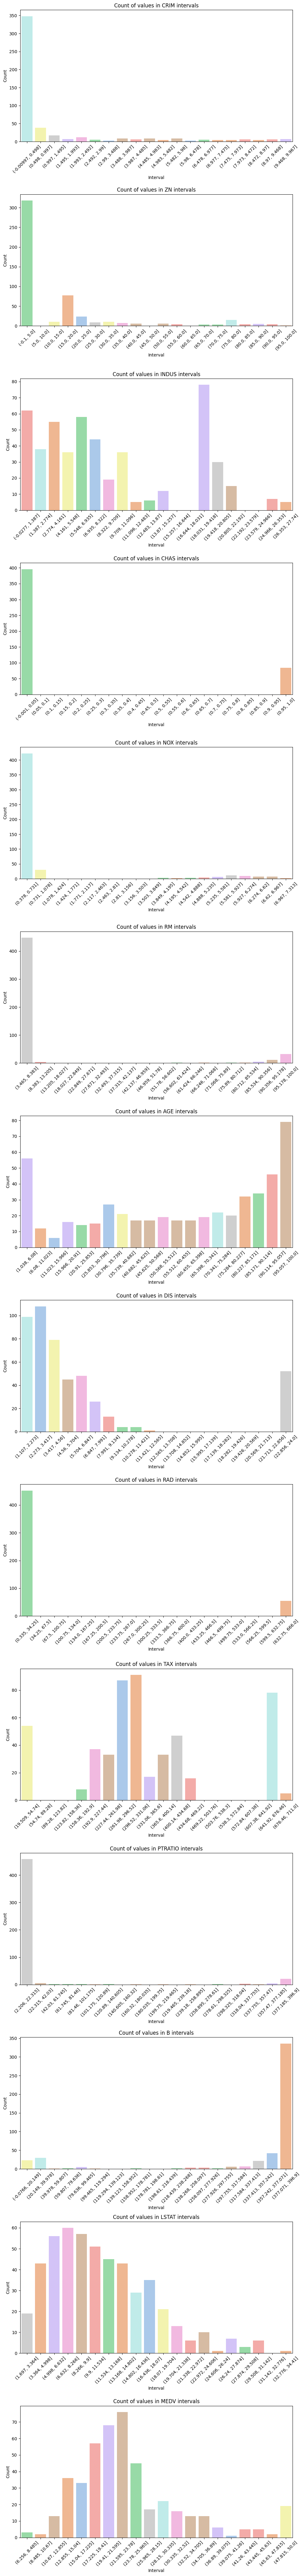

In [6]:
NUM_OF_INTERVALS = 20
df_backup = deepcopy(df)
colors = sns.color_palette('pastel', NUM_OF_INTERVALS)
fig, axes = plt.subplots(nrows=len(df_backup.columns), figsize=(10, 6 * len(df_backup.columns)))
for i, column in enumerate(df_backup.columns):

    if pd.api.types.is_numeric_dtype(df_backup[column]):
        intervals = pd.cut(df_backup[column], bins=NUM_OF_INTERVALS)
        value_counts = intervals.value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i],hue=value_counts.values,palette="pastel",legend = False)
        axes[i].set_title(f'Count of values in {column} intervals')
        axes[i].set_xlabel('Interval')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', labelrotation=45)
    else:
        value_counts = df_backup[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i],hue=value_counts.values,palette="pastel",legend=False)
        axes[i].set_title(f'Count of unique values for {column}')
        axes[i].set_xlabel('Unique values')
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Q4: Correlation

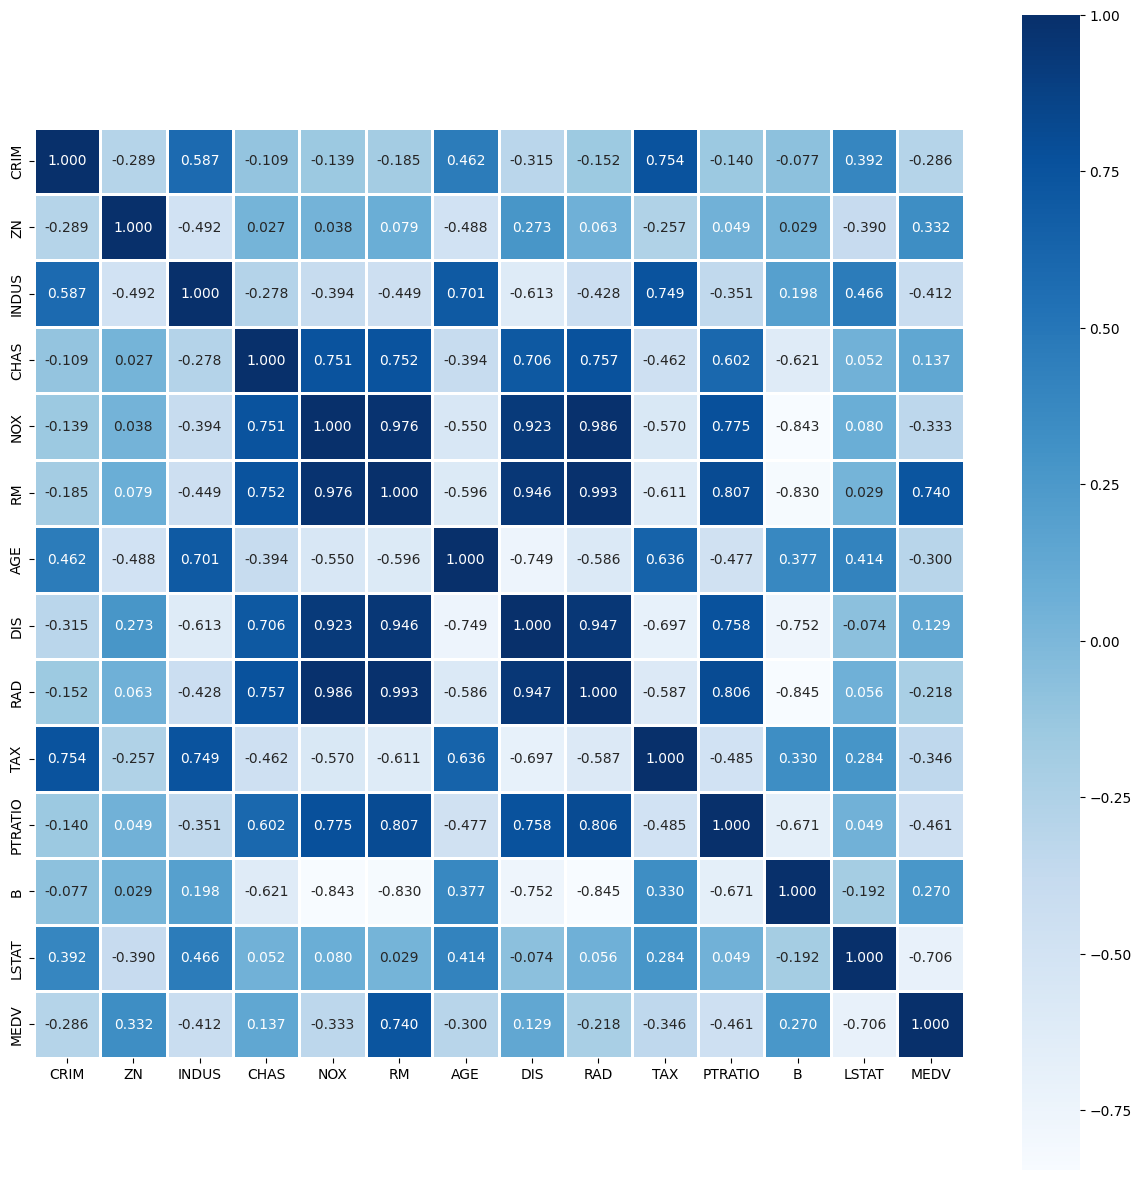

In [7]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
plt.show()

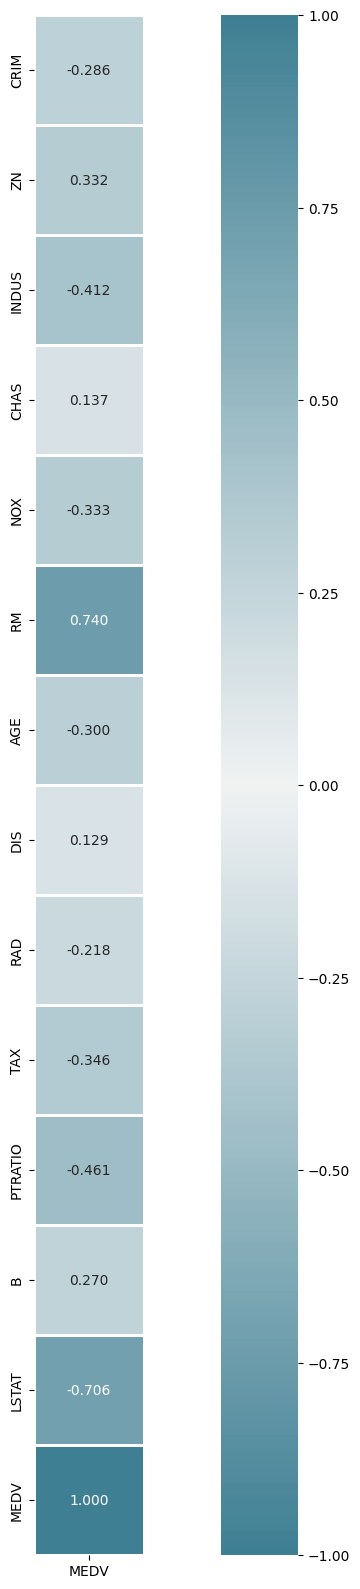

In [8]:
corr = df.corr()
corr = corr[['MEDV']]
plt.figure(figsize=(20, 20))
cmap = diverging_palette(220, 220, as_cmap=True)
heatmap(corr, annot=True, fmt=".3f", cmap = cmap, linewidths=1, square=True, center=0, vmax=1, vmin=-1)
plt.show()

### Q5: Scatter and Hexbin Plot for Visualizing Feature Relation to the Target

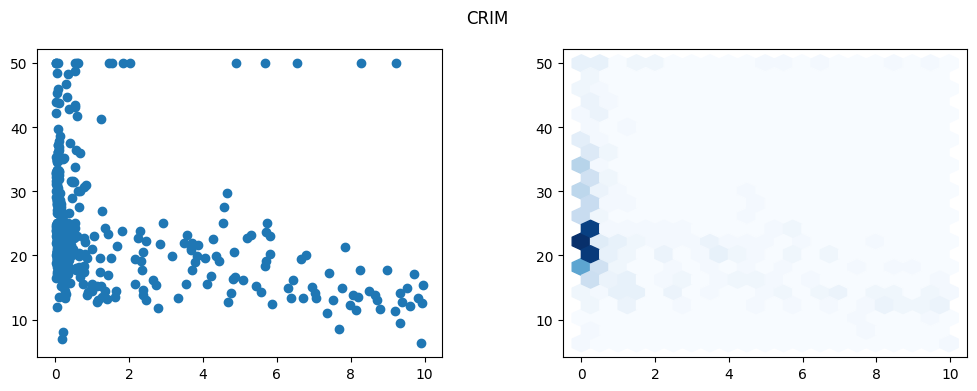

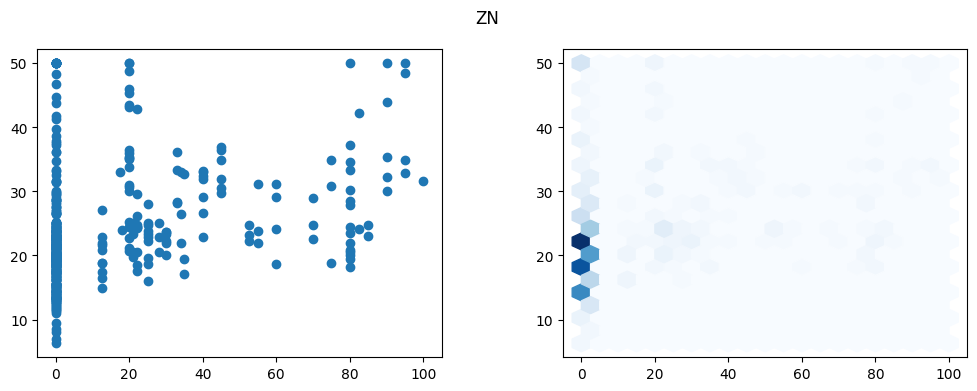

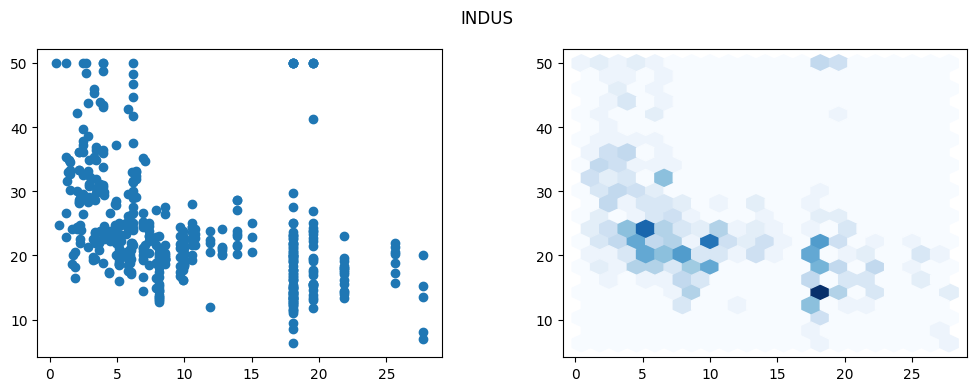

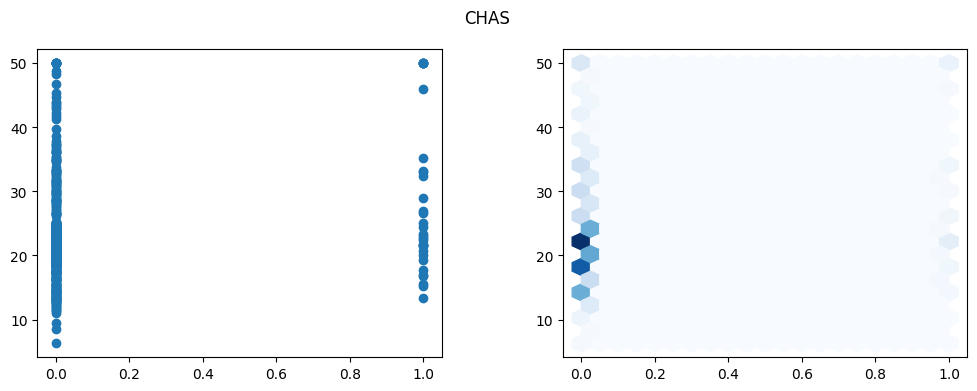

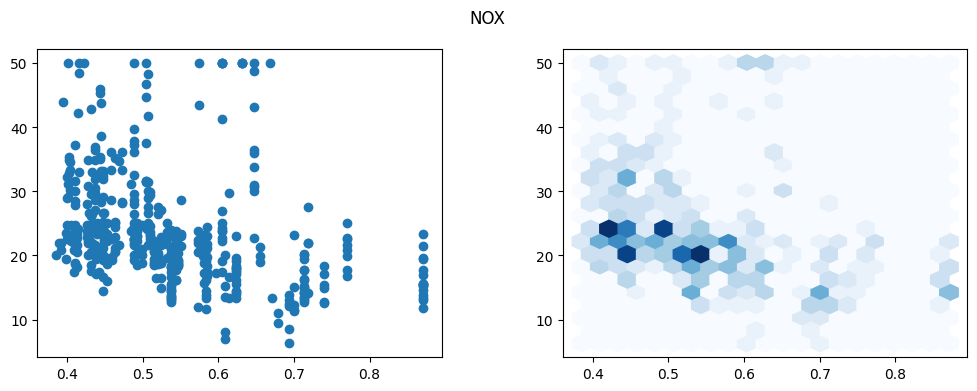

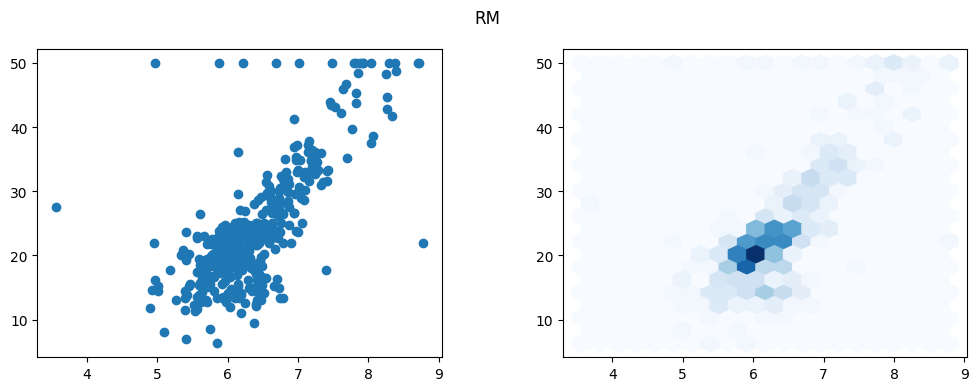

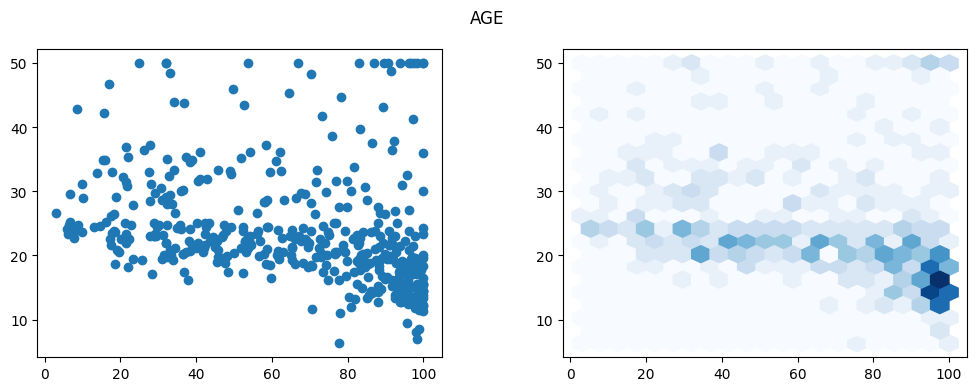

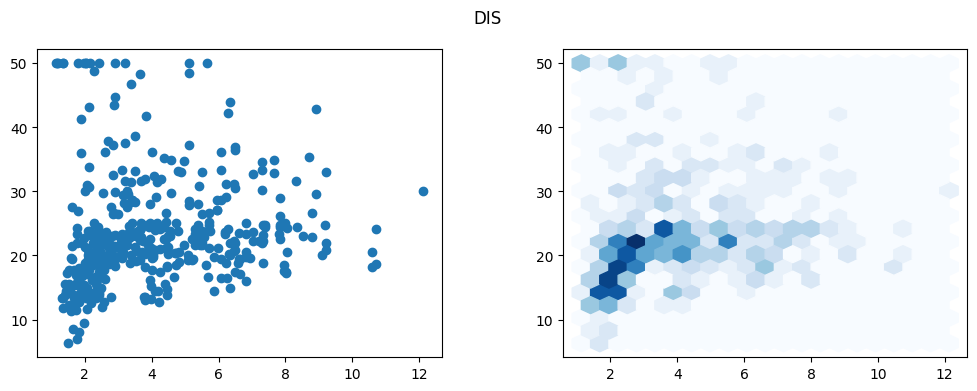

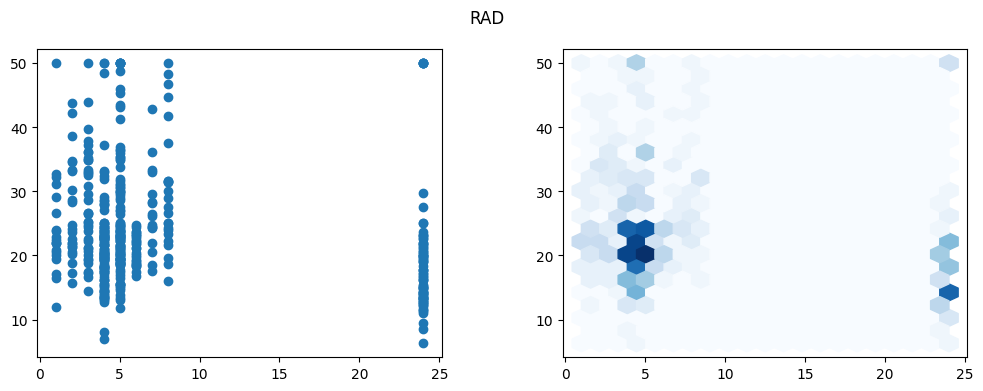

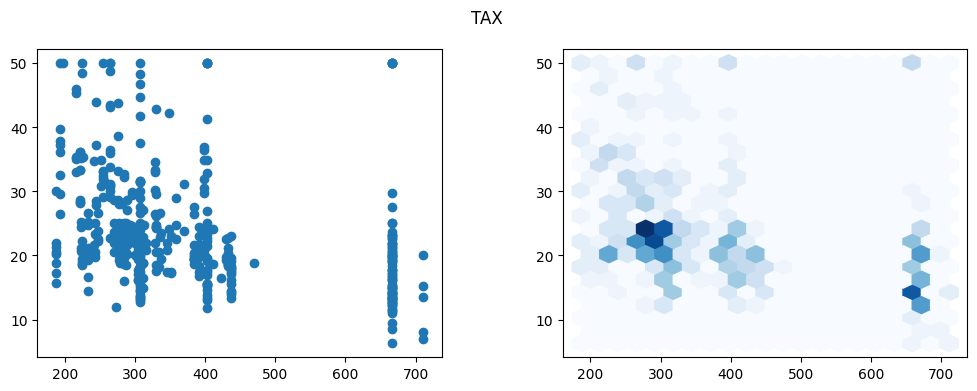

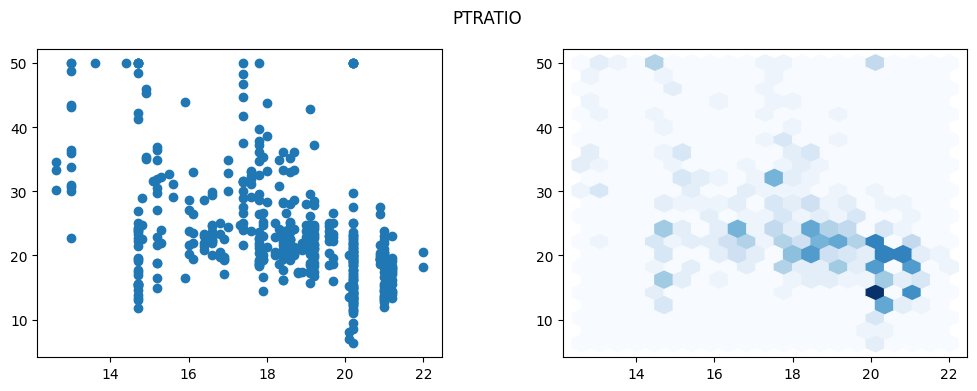

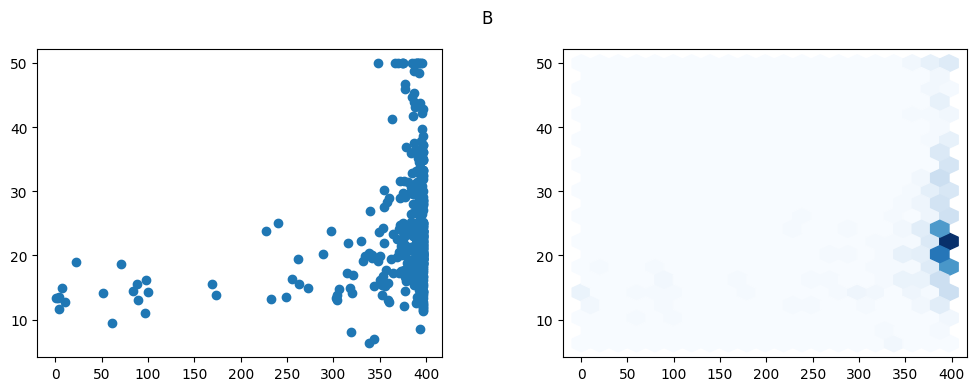

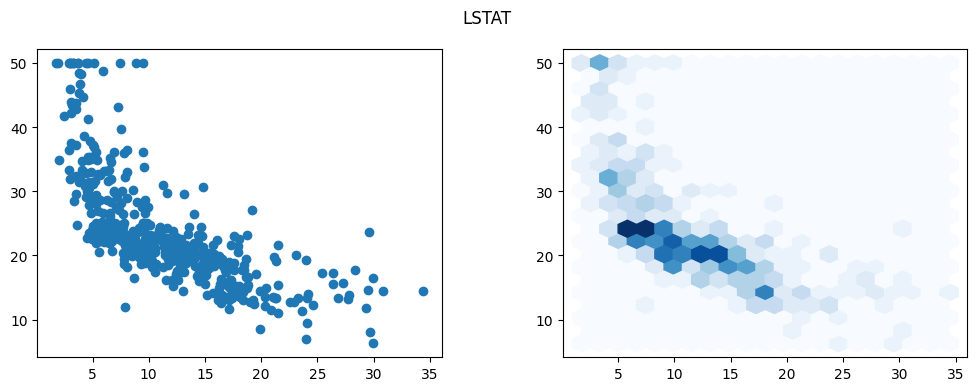

In [9]:
def plot_corr_scatter_hexbin(col):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    plt.suptitle(col)
    axs[0].scatter(df[col], df["MEDV"])
    axs[1].hexbin(df[col], df["MEDV"], gridsize=20, cmap="Blues")
    plt.subplots_adjust(wspace=0.3)
    plt.show()
price_corr = df.corr(numeric_only=True)["MEDV"].drop("MEDV")
for col in price_corr.index:
    plot_corr_scatter_hexbin(col)

### Q6: Suggestion for Other Data Analysis Methods

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (506, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
There are 14 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ZN,float64,0.000000,NA,0.000000,1.000000,Column has 45 outliers greater than upper bound (0.45) or lower than lower bound(-0.27). Cap them or remove them.
INDUS,float64,0.000000,NA,0.000000,1.000000,No issue
LSTAT,float64,0.000000,NA,0.000000,1.000000,Column has 12 outliers greater than upper bound (0.79) or lower than lower bound(-0.23). Cap them or remove them.
MEDV,float64,0.000000,NA,6.300000,50.000000,Column has 58 outliers greater than upper bound (34.15) or lower than lower bound(9.75). Cap them or remove them.
label,float64,0.000000,NA,0.000000,2.000000,"Column has 203 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them., Column has a high correlation with ['MEDV']. Consider dropping one of them."


Number of All Scatter Plots = 15


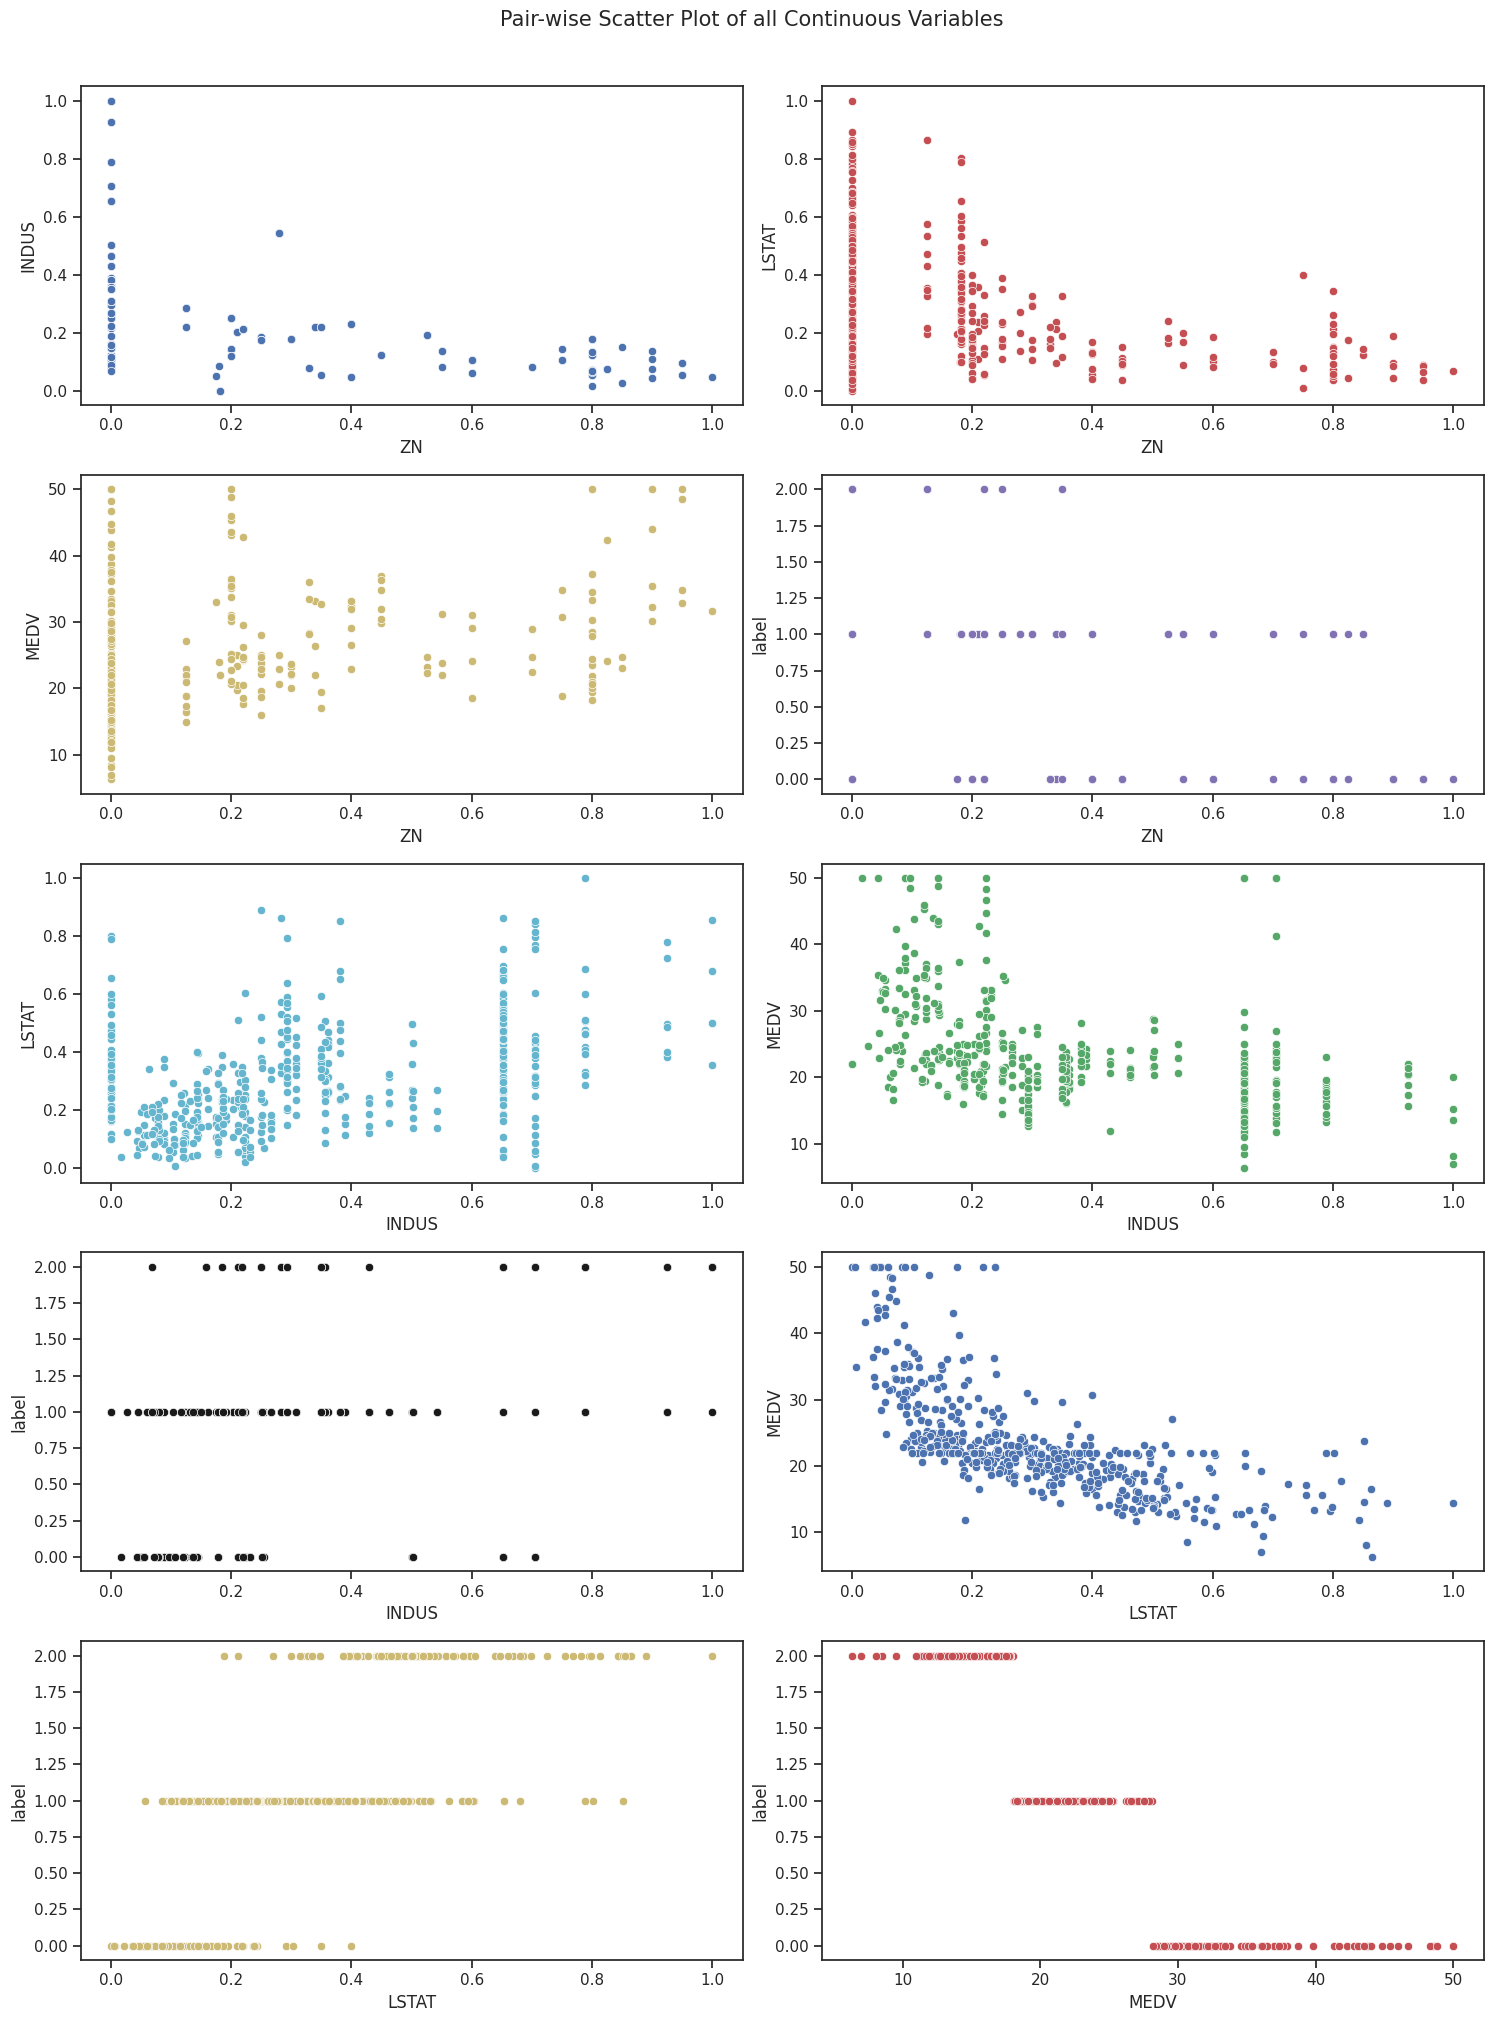

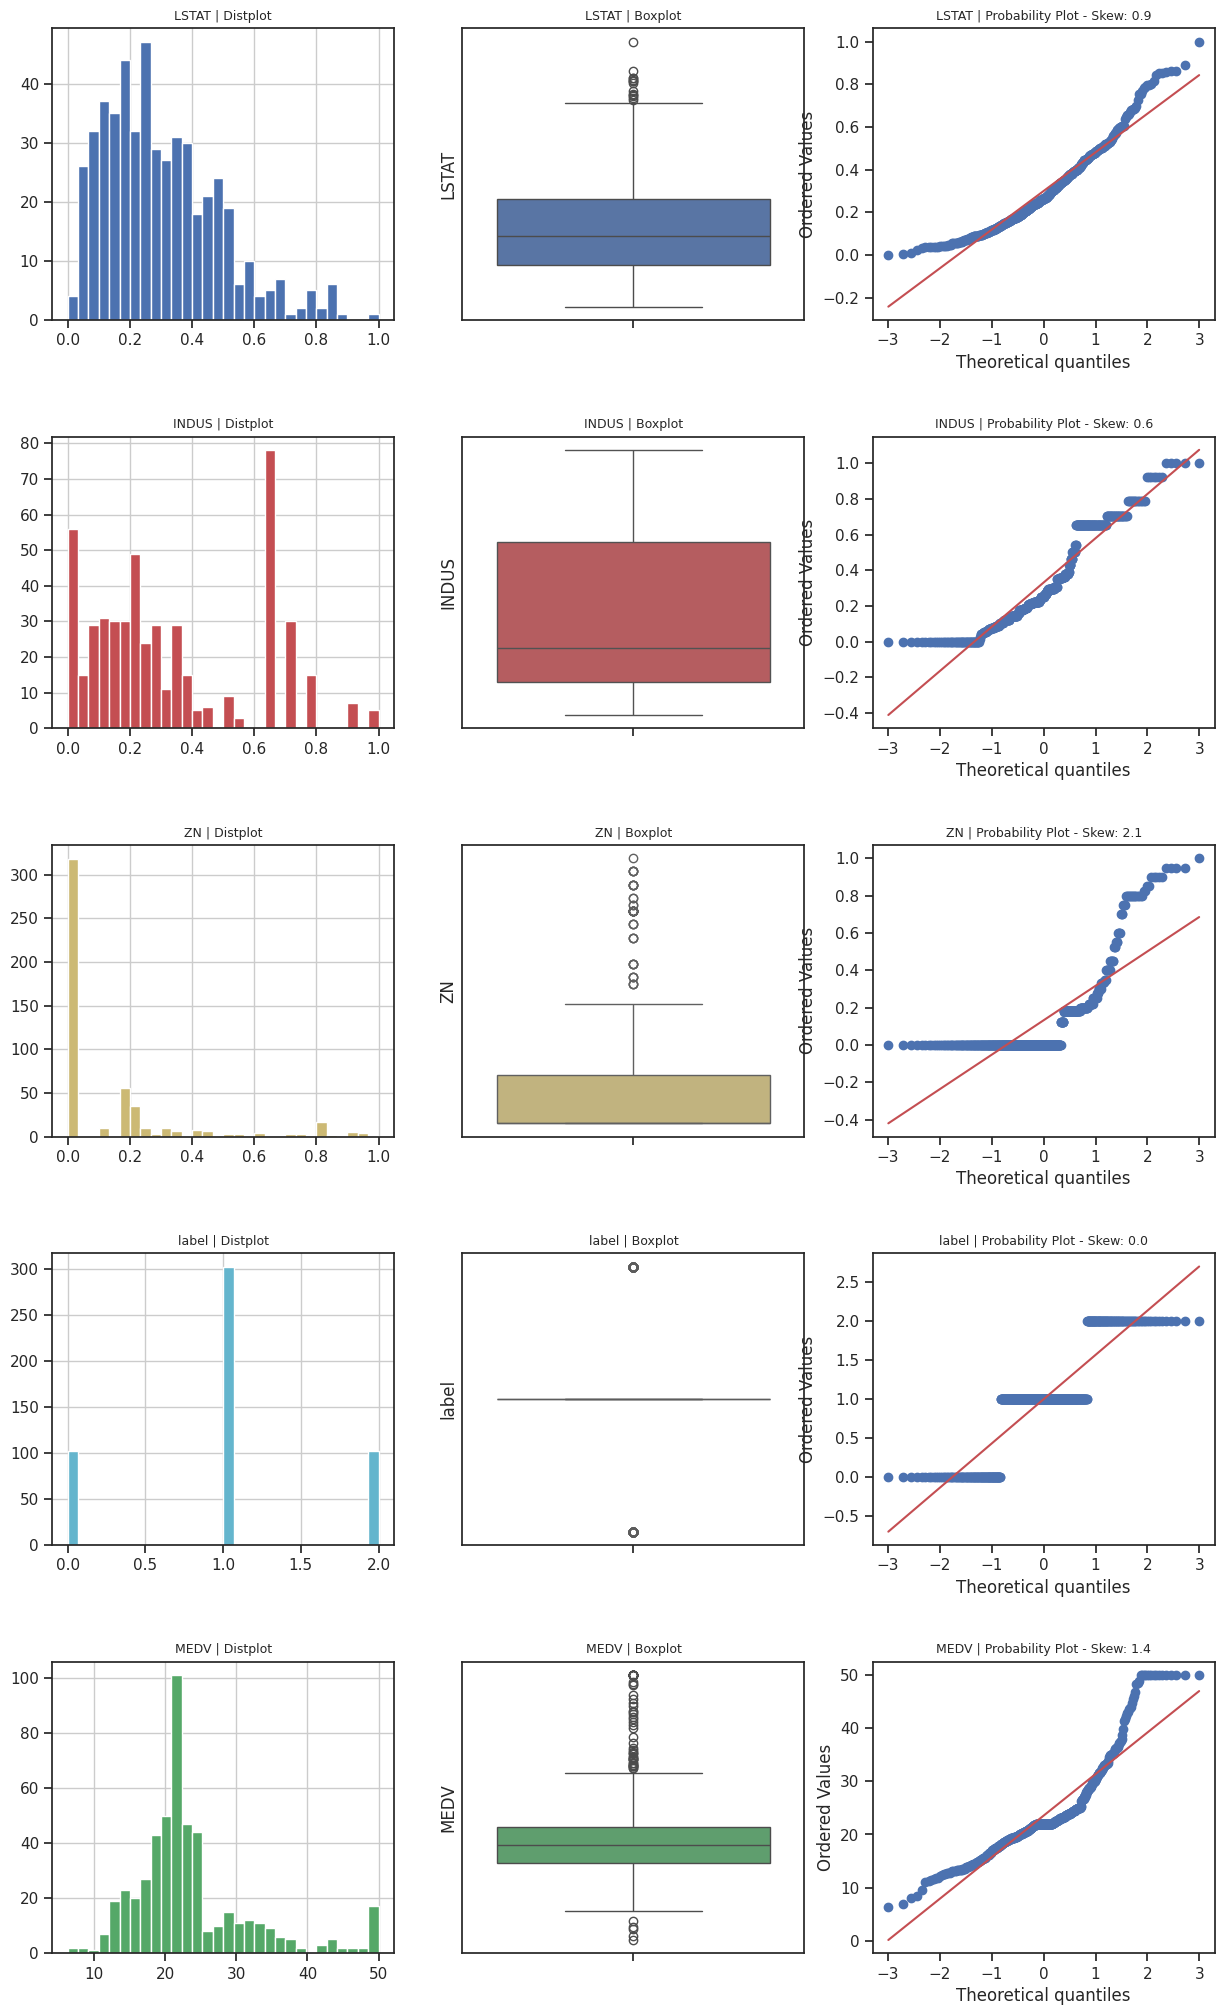

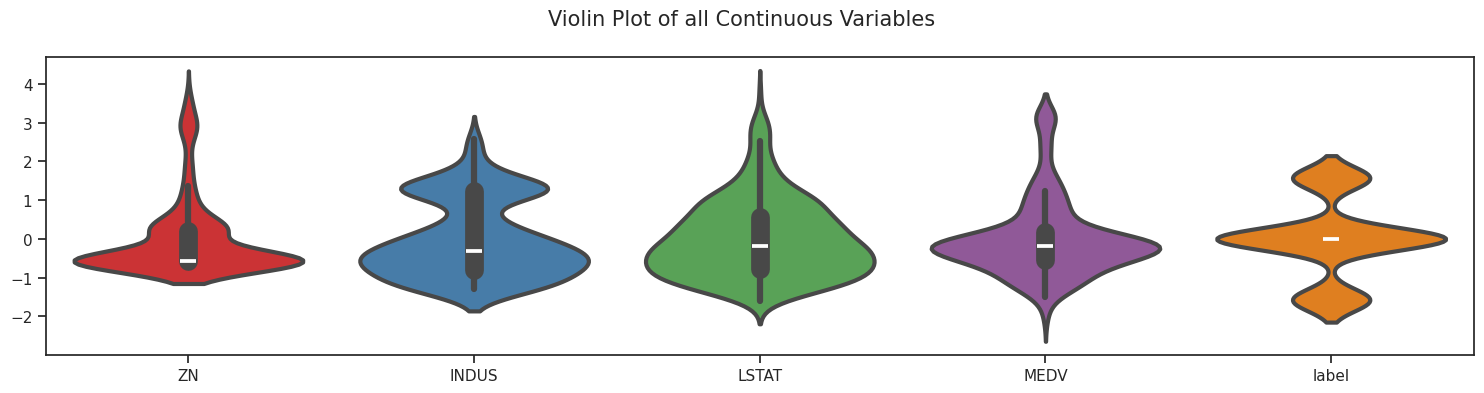

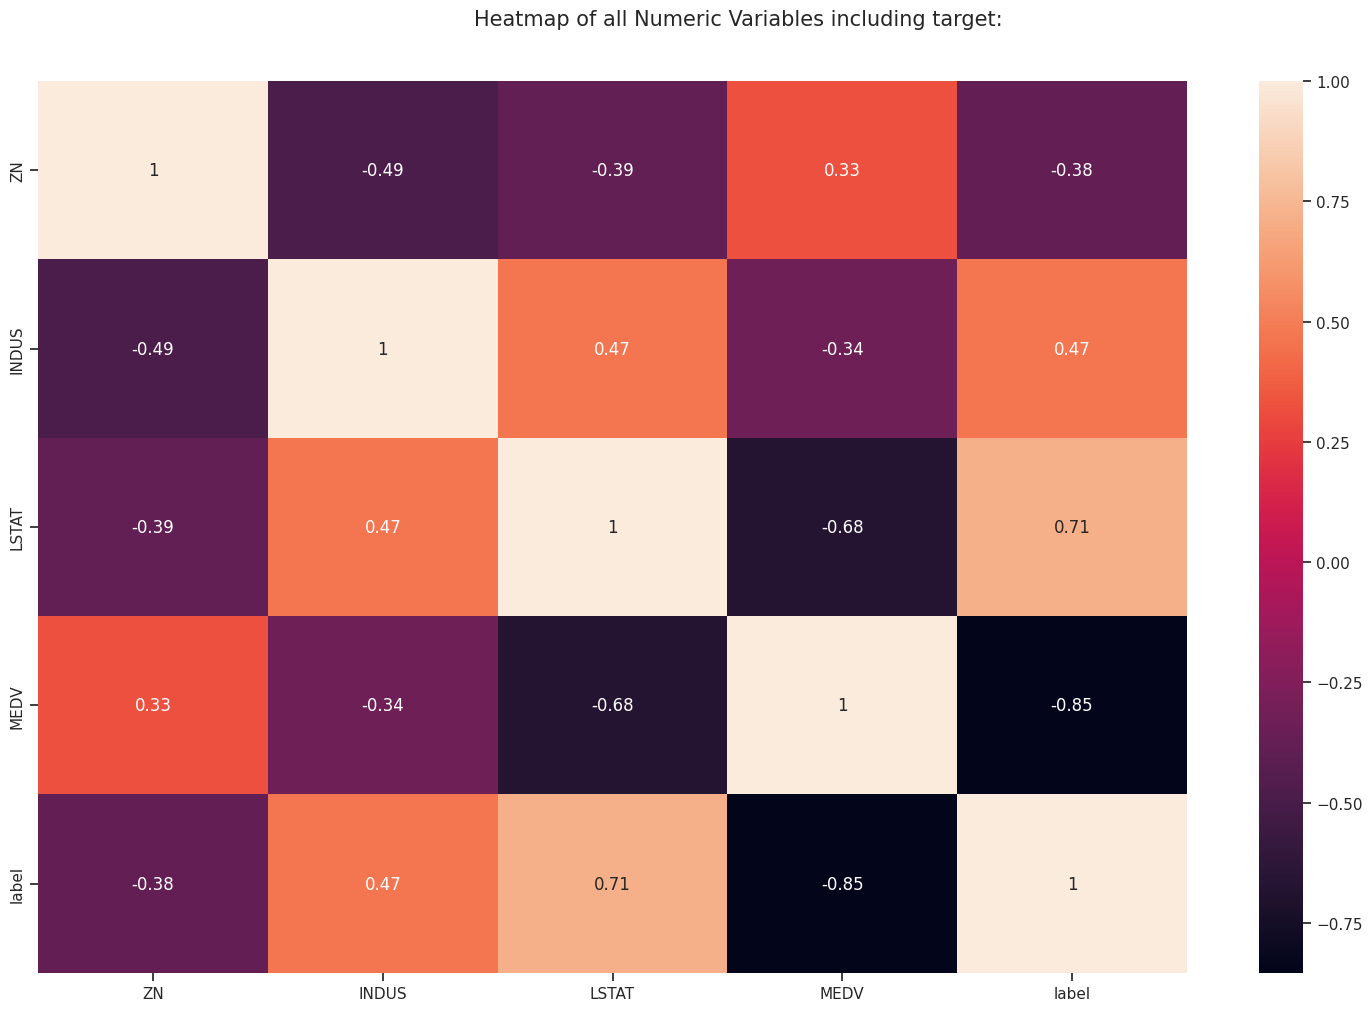

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [59]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()
filename = "/kaggle/input/corona-virus-report/covid_19_clean_complete.csv"
%matplotlib inline
sep = ","
dft = av.AutoViz(
    df,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

## Preprocessing Stage

### Q7: Filling Missing Values:

There are various approaches towards filling missing values. It depends on the dataset and the value of the columns and the number of missing data in each column.
I have used three techniques in the below code.
One method is **dropping** the columns that contain missing values. This method may not be very suitable for this dataset, because according to the percentage value we calculated earlier in this project, not a large ratio of the dataset is lost. Therefore, by removing the columns containing missing values, we may loose valuable data.  

In [10]:
df_backup = deepcopy(df)
df_imputed = deepcopy(df)
df.fillna(df.median(numeric_only=True), inplace=True)
missing_values(df)

,Missing,Percentage
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


In [11]:
df_filled = df_backup.ffill()
missing_values(df_filled)

,Missing,Percentage
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


In [12]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_imputed)
imputed = pd.DataFrame(imputed, columns=df_imputed.columns)

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.166008,1.101175,15.679800,58.744660,6.089248,78.063241,339.317787,42.614980,338.957866,11.537806,23.558300
std,2.399207,23.048697,7.169630,0.372456,1.646991,27.220206,33.104049,6.371337,203.542157,180.670077,87.585243,119.218004,6.064932,8.342912
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.471800,4.000000,254.000000,17.000000,372.182500,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.256850,24.000000,403.000000,20.200000,395.597500,15.015000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [14]:
imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.176285,1.101175,15.679800,58.744660,6.176262,78.063241,339.317787,42.614980,332.741107,11.537806,24.097352
std,2.399207,23.048697,7.169630,0.375369,1.646991,27.220206,33.104049,6.476962,203.542157,180.670077,87.585243,125.289897,6.064932,8.546710
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.426875,4.000000,254.000000,17.000000,364.385000,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.690000,10.380000,22.260000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.597500,15.015000,28.700000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


### Q8: Which columns be dropped?

In [15]:
correlations = df.corr()['MEDV']
columns_to_drop = correlations[abs(correlations) < 0.3].index
df = df.drop(columns=columns_to_drop)
df

,ZN,INDUS,LSTAT,MEDV
0,18.0,2.31,4.98,24.0
1,0.0,7.07,9.14,21.6
2,0.0,7.07,4.03,34.7
3,0.0,2.18,2.94,33.4
4,0.0,2.18,5.33,36.2
...,...,...,...,...
501,0.0,11.93,9.67,22.4
502,0.0,11.93,9.08,20.6
503,0.0,11.93,5.64,23.9
504,0.0,11.93,6.48,22.0


### Q9: Categorical and Numerical data

In [16]:
df.dtypes

ZN       float64
INDUS    float64
LSTAT    float64
MEDV     float64
dtype: object

### Q10. Normalization and Standardization, should we use them?

Normalization means scaling the values of the features to a fixed range. For example, we can scale the values to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the `MinMaxScaler` method to do this. We can't use normalization when we are not using algorithms such as `KNN` or `Neural Networks` which are based on distance. Below is the formula for the `MinMaxScaler` method:

$$ 
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} 
$$

Standardization means scaling the values of the features to have a mean of 0 and a standard deviation of 1. This method is useful when we have features with different means and standard deviations. We can use the `StandardScaler` method to do this. Below is the formula for the `StandardScaler` method:

$$ 
X_{\text{std}} = \frac{X - \mu}{\sigma} 
$$

To answer when we need to do them I quote from [this link](https://scikit-learn.org/stable/modules/preprocessing.html):

**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.


In [17]:
class DataScaler:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.numeric_cols = df.select_dtypes(include="number")
        self.scaler_std = StandardScaler()
        self.scaler_norm = MinMaxScaler()

    def standardization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_std.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]

    def normalization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_norm.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]

scalar = DataScaler(df)

In [ ]:
scalar.df.describe()

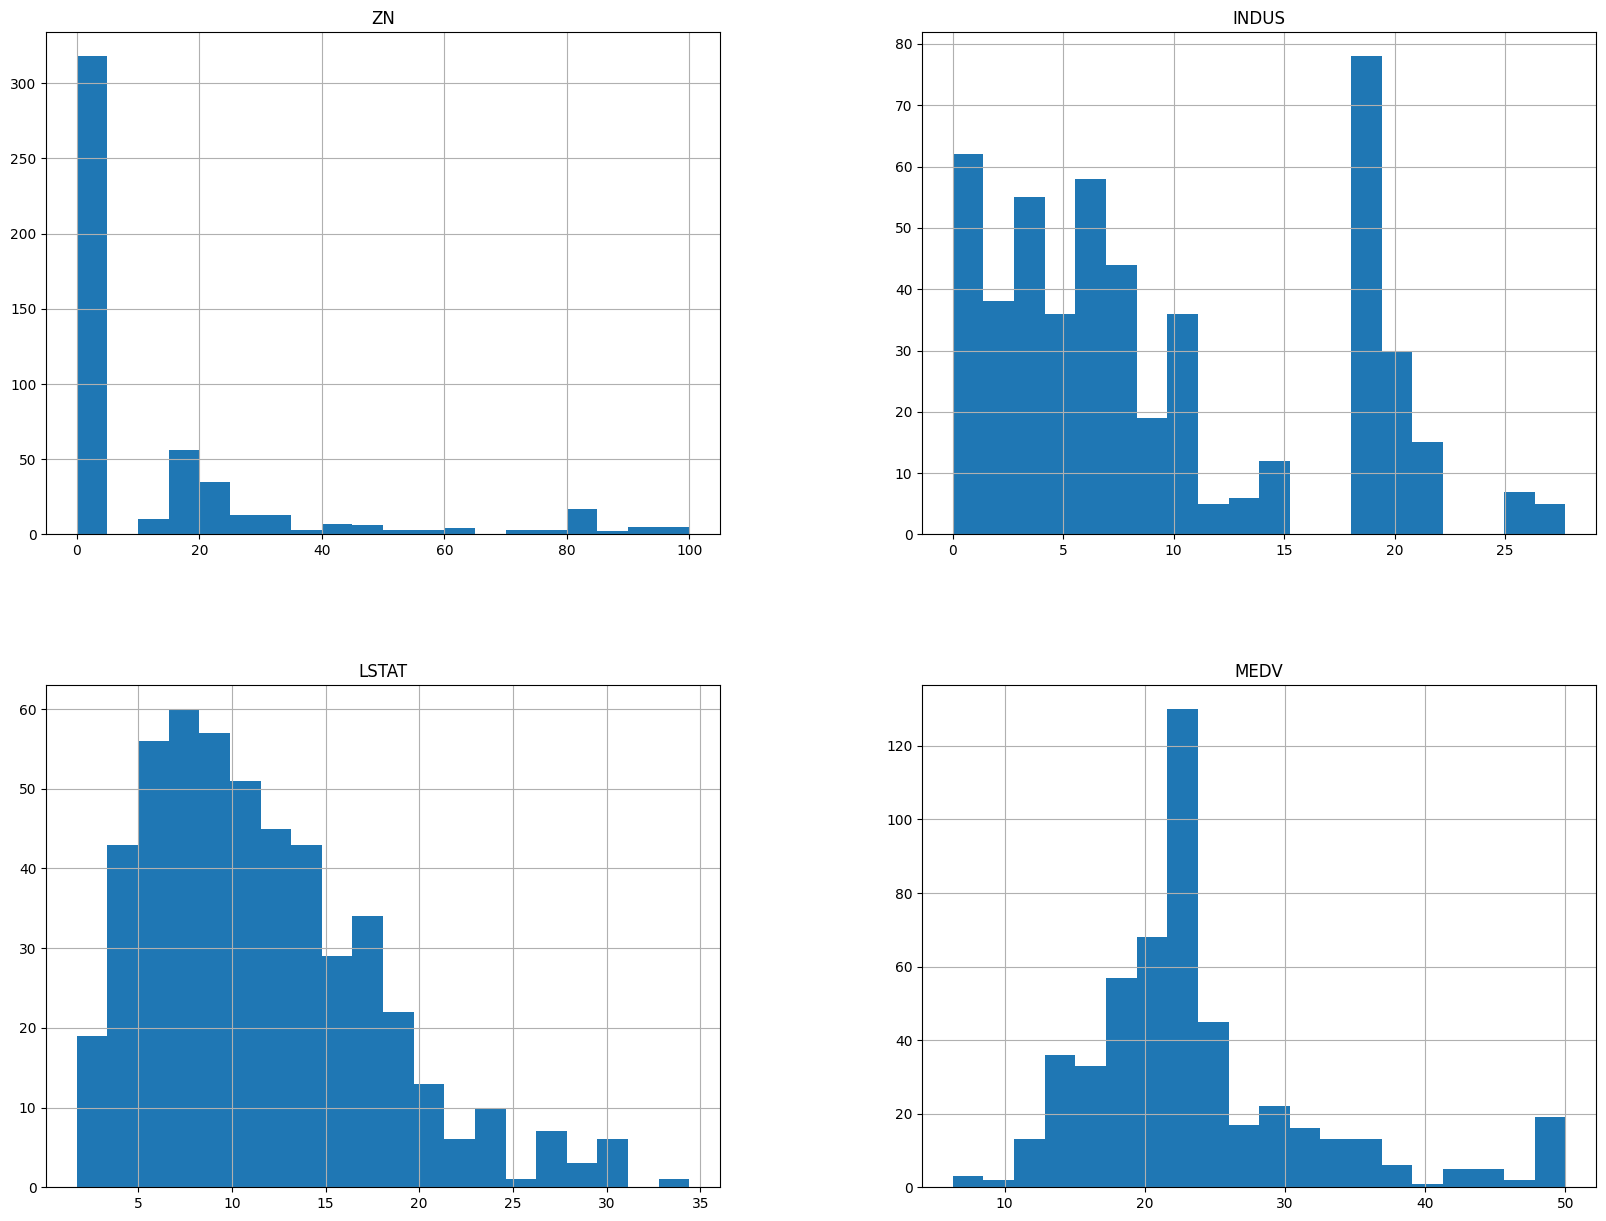

In [18]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()


In [19]:
scalar.normalization(exclude_cols=["MEDV"])
# scalar.standardization(exclude_cols=["MEDV"])
scalar.df.describe()


,ZN,INDUS,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000
mean,0.132953,0.331837,0.300116,23.558300
std,0.230487,0.258458,0.185585,8.342912
min,0.000000,0.000000,0.000000,6.300000
25%,0.000000,0.124009,0.157512,19.000000
50%,0.000000,0.250901,0.264688,21.950000
75%,0.181000,0.652487,0.406518,25.000000
max,1.000000,1.000000,1.000000,50.000000


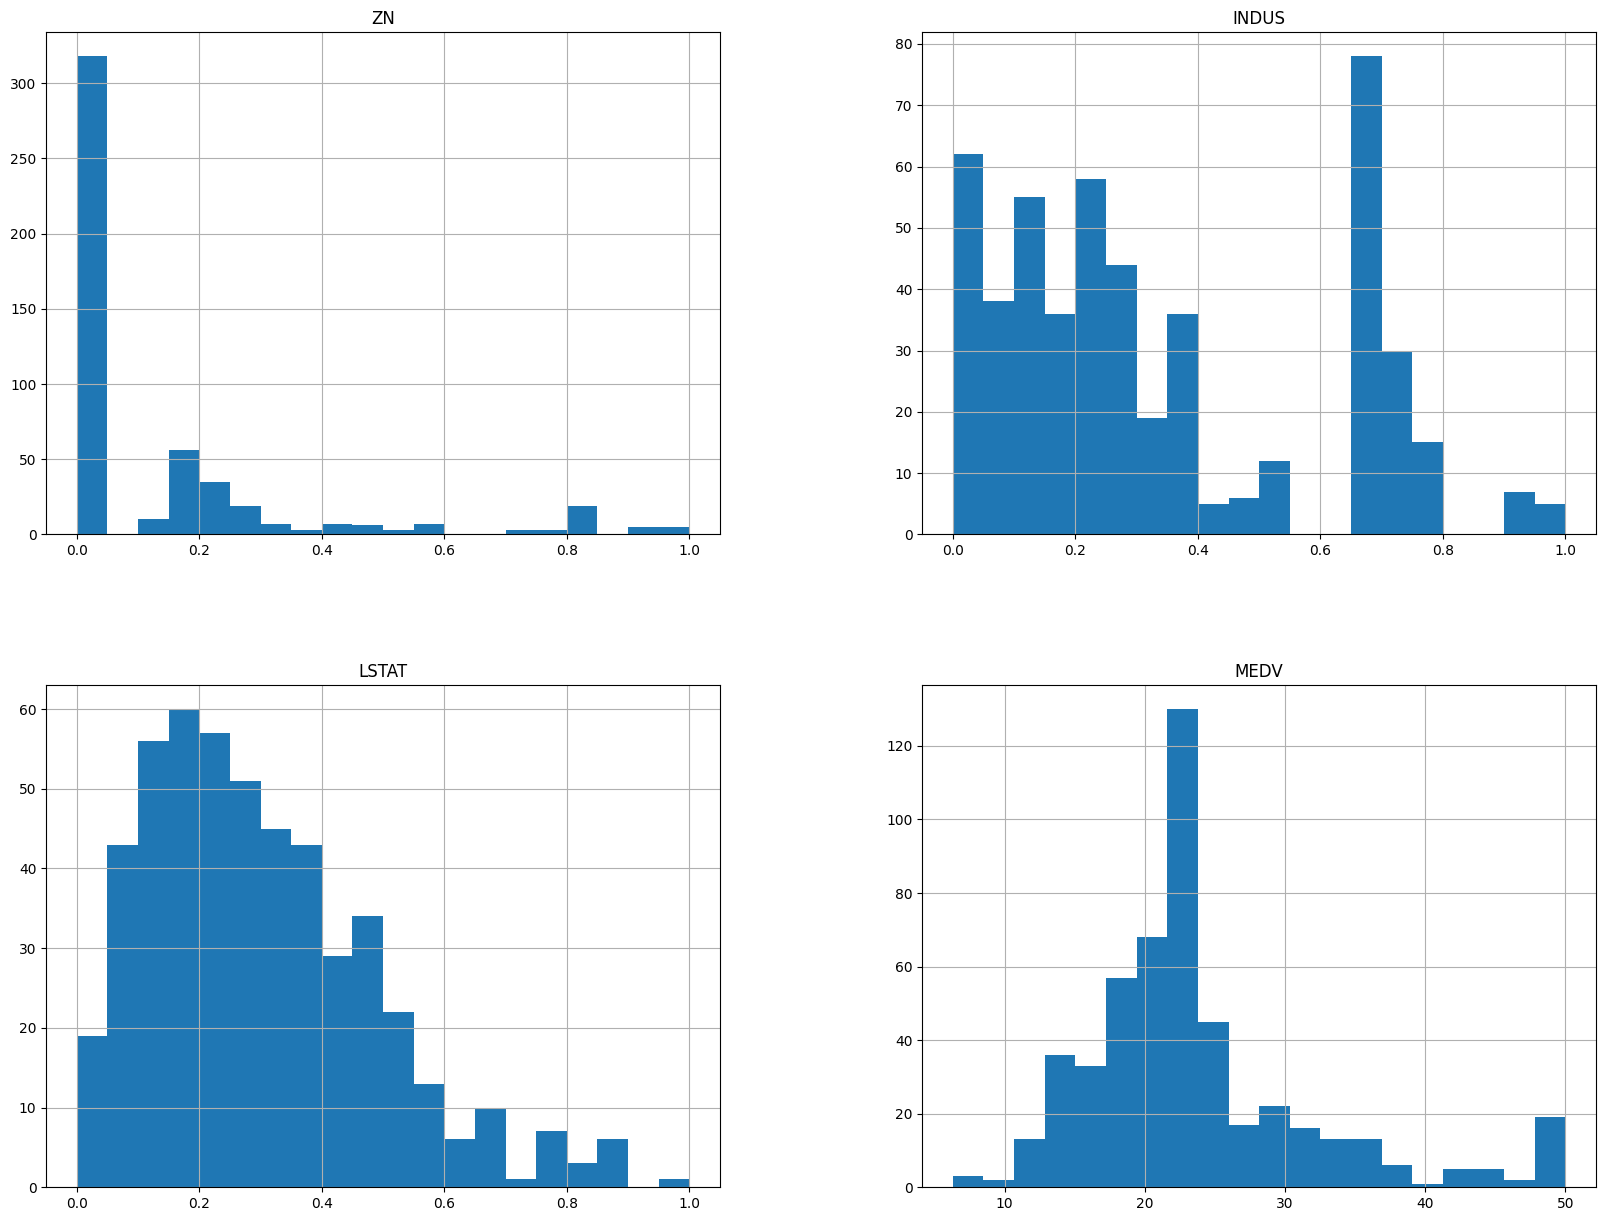

In [20]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()

### Q11: How to handel categorical data?
There are several preprocessing techniques that can be used to handle categorical data before feeding it into machine learning algorithms. Some common techniques include:

1. Encoding:
- Label encoding: Assigning a unique integer to each category in a feature. However, this can introduce ordinal relationships that may not exist in the data.
- One-Hot encoding: Creating binary columns for each category in a feature. Each column represents a category, with a value of 1 indicating the presence of that category and 0 indicating absence.

2. Target encoding: Replacing each category with the mean of the target variable for that category.

3. Frequency encoding: Replacing each category with the frequency of that category in the dataset.

4. Binary encoding: Convert categories into binary features.

5. Embedding: Representing categories as dense vectors in a high-dimensional space, where the similarity between categories is captured.

Each preprocessing technique has its own advantages and disadvantages, and the choice of technique depends on the specific dataset and machine learning algorithm being used. It is important to experiment with different techniques and evaluate their performance to determine the most effective preprocessing method for a given dataset.


### Q12: Test, Train, Validation:
Testing data are used to test the model. Training data is used to train the model, and there is a section called Validation data, is used to evaluate performance of the machine learning model during training.
During the model development process, the training data is used to train the model, the validation data is used to tune the model hyperparameters and assess its performance, and the test data is used to evaluate the final model performance.

The validation data helps in preventing overfitting by providing an independent dataset for evaluating the model's performance. By using separate training and validation sets, you can assess the model's generalization ability and make adjustments to the model to improve its performance.

In [21]:
class Data:
    def __init__(self, data):
        self.data = data
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def split_for_classification(self, goal,label):
        splitted = train_test_split(self.data.drop([goal,label], axis = 1), self.data[label], test_size = 0.1, random_state=1)
        self.X_train, self.X_test, self.y_train, self.y_test = splitted

    def split_for_linearReg(self, x, y):
        splitted = train_test_split(self.data[x], self.data[y], test_size = 0.1, random_state=1)
        self.X_train, self.X_test, self.y_train, self.y_test = splitted
    def split_for_svm(self,goal,label):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data.drop([goal,label], axis = 1), self.data[label], test_size=0.2, random_state=42)



### Q13: Other examples of preprocessing:
Z-score, Dimension Reduction methods like PCA that I have used in Clustering project, and also preprocessing techniques like stopwords, lemmatization and ... that I have implemented in NLP project.

### Q14: Supervised learning, Unsupervised learning, Reinfrocement Learning:
Supervised Learning: Labeled Dataset, like Classification, NN, Logistic Regression

UnSupervised Learning: Not Labeled Dataset, like Clustering Project

RL: Reinforcement Learning is a type of machine learning where an agent learns to make decisions by interacting with an environment, receiving rewards or penalties based on its actions.

### Q15: What is Regression and What is the difference from Classification?

The main difference between regression and classification is the type of output they predict. Regression predicts continuous numerical values, while classification predicts discrete class labels.

In regression, the output variable is continuous and can take any numerical value within a range. In classification, the output variable is categorical and belongs to a specific class or category.

Regression algorithms are evaluated using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared, while classification algorithms are evaluated using metrics like accuracy, precision, recall, and F1 score.

The choice between regression and classification depends on the nature of the problem and the type of output needed. If the goal is to predict a numeric value, regression is used. If the goal is to classify data into categories, classification is used.

### Q16: Linear Regression:
Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$




The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [22]:
class Linear_regression():
    def __init__(self, data):
        self.data = data
        self.intercept = ((self.data.X_train - self.data.X_train.mean()) * (self.data.y_train - self.data.y_train.mean())).sum() / ((self.data.X_train - self.data.X_train.mean())**2).sum()
        self.slope = self.data.y_train.mean() - self.intercept * self.data.X_train.mean()
        self.predicted_values = self.intercept * self.data.X_test + self.slope
        self.RMSE = None
        self.R2 = None

    def get_intercept_slope(self):
        return(self.intercept, self.slope)

    def get_predictions(self):
        return(self.predicted_values)

    def get_RSME(self):
        n = self.predicted_values.shape[0]
        self.RMSE = math.sqrt(((self.predicted_values - self.data.y_test) ** 2).sum() / n)
        return(self.RMSE)

    def get_RSME_train(self):
        train_predict = self.intercept * self.data.X_train + self.slope
        n = train_predict.shape[0]
        train_RMSE = math.sqrt(((train_predict - self.data.y_train) ** 2).sum() / n)
        return(train_RMSE)

    def get_R2_score(self):
        self.R2 = 1 - (((self.predicted_values - self.data.y_test) ** 2).sum() / ((self.data.y_test - self.data.y_test.mean()) ** 2).sum())
        return(self.R2)

    def get_R2_score_train(self):
        train_predict = self.intercept * self.data.X_train + self.slope
        train_R2 = 1 - (((train_predict - self.data.y_train) ** 2).sum() / ((self.data.y_train - self.data.y_train.mean()) ** 2).sum())
        return(train_R2)

    def get_confusion_matrix(self):
        threshold = 0.5  # Threshold for classification
        predicted_classes = (self.predicted_values > threshold).astype(int)
        self.conf_matrix = confusion_matrix(self.data.y_test, predicted_classes)
        return self.conf_matrix

    def show_result(self, ax, feature):
        headers = ["Metric", "Test", "Train"]
        table = [
            ["RSME", self.get_RSME(), self.get_RSME_train()],
            ["R2", self.get_R2_score(), self.get_R2_score_train()]
        ]
        print(feature, ':')
        print(tabulate(table, headers=headers))
        a, b = self.get_intercept_slope()
        x = np.linspace(0, 1, 100)
        y = a * x + b
        ax.plot(x, y, color='red', label='Regression Line')
        ax.scatter(self.data.X_train, self.data.y_train)
        ax.set_title(feature)
        ax.legend()


### Q18: RMSE, R2, MSE, RSS:

Mean Squared Error (MSE):
Mean Squared Error (MSE) is a common metric used to measure the average squared difference between the actual target values and the predicted values by the linear regression model.

Residual Sum of Squares (RSS) is another metric used to measure the sum of squared differences between the actual target values and the predicted values by the linear regression model.



ZN :
Metric        Test     Train
--------  --------  --------
RSME      8.46694   7.8143
R2        0.066425  0.110439
INDUS :
Metric         Test     Train
--------  ---------  --------
RSME      8.67975    7.74398
R2        0.0189058  0.126377
LSTAT :
Metric        Test     Train
--------  --------  --------
RSME      6.73783   6.04511
R2        0.408797  0.467642
MEDV :
Metric      Test    Train
--------  ------  -------
RSME           0        0
R2             1        1


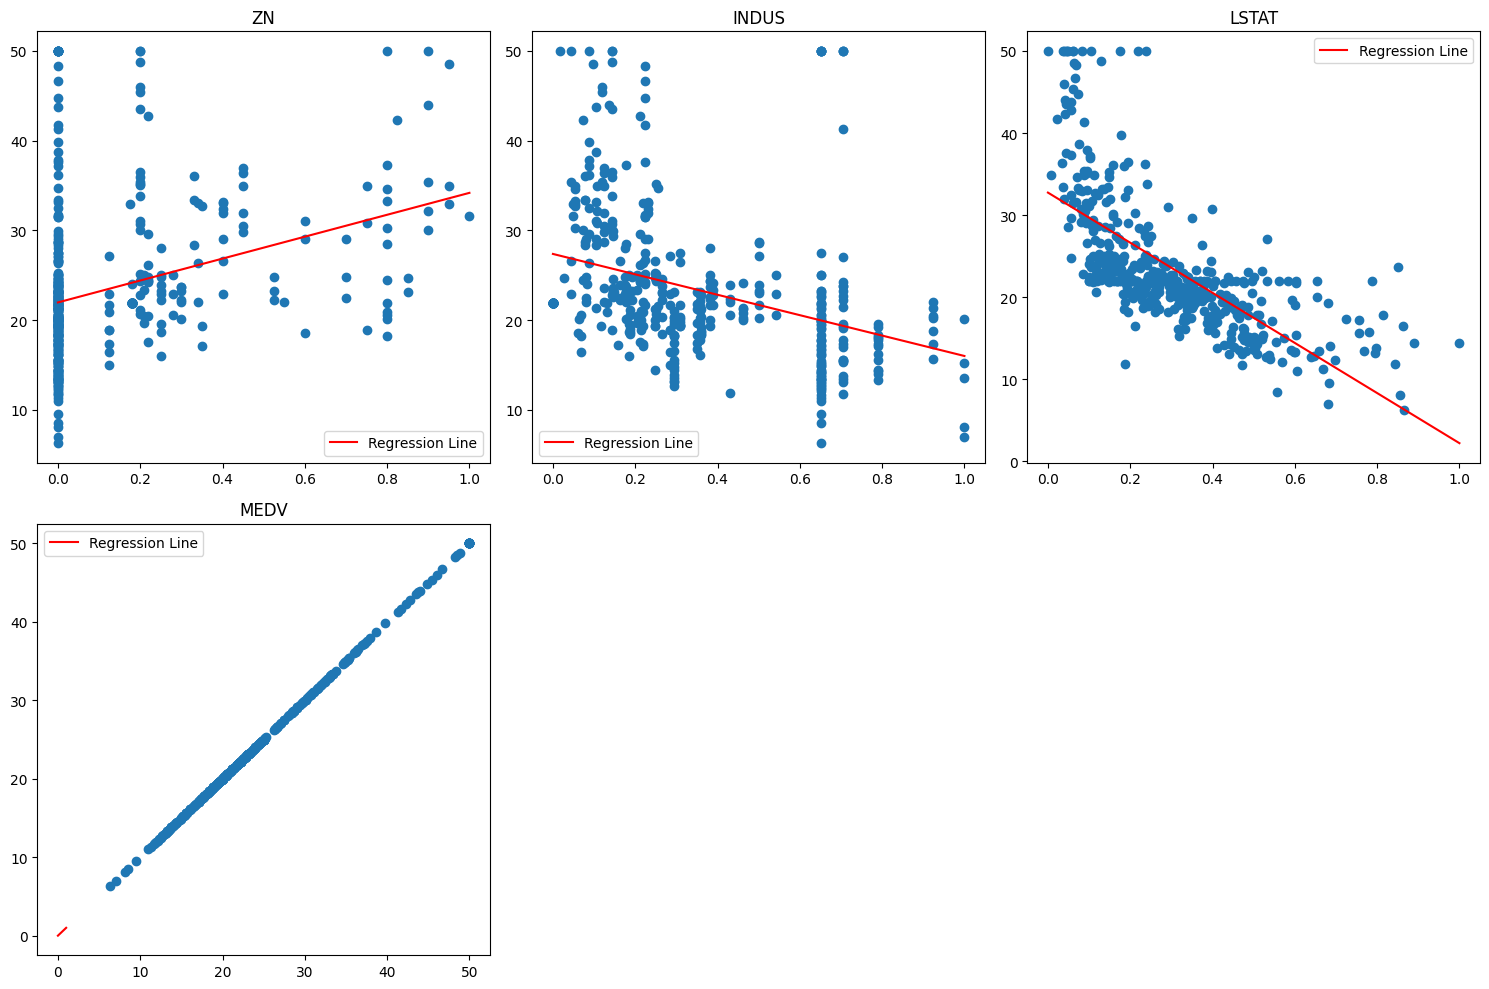

In [23]:
goal = 'MEDV'
prepared_data = Data(df)
num_features = len(df.columns)
num_rows = (num_features + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    prepared_data.split_for_linearReg(feature, goal)
    reg = Linear_regression(prepared_data)
    reg.show_result(axes[row, col], feature)
for i in range(num_features, num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Classification

In [24]:

def label_data(df):
    deciles = df['MEDV'].quantile([0.2, 0.8])
    df.loc[df['MEDV'] >= deciles.iloc[1], 'label'] = int(0)#luxury
    df.loc[df['MEDV'] <= deciles.iloc[0], 'label'] = int(2)#economic
    df.loc[(df['MEDV'] > deciles.iloc[0]) & (df['MEDV'] < deciles.iloc[1]), 'label'] = int(1)#normal
    return df

labeled_df = label_data(df)
print(labeled_df)
feature_data = Data(labeled_df)
feature_data.split_for_classification('MEDV','label')

       ZN     INDUS     LSTAT  MEDV  label
0    0.18  0.083273  0.099449  24.0    1.0
1    0.00  0.254867  0.226744  21.6    1.0
2    0.00  0.254867  0.070379  34.7    0.0
3    0.00  0.078587  0.037026  33.4    0.0
4    0.00  0.078587  0.110159  36.2    0.0
..    ...       ...       ...   ...    ...
501  0.00  0.430065  0.242962  22.4    1.0
502  0.00  0.430065  0.224908  20.6    1.0
503  0.00  0.430065  0.119645  23.9    1.0
504  0.00  0.430065  0.145349  22.0    1.0
505  0.00  0.430065  0.188188  11.9    2.0

[506 rows x 5 columns]


### Q21: Pruning

Pruning in decision trees is a technique used, in order to avoid extra complications during classification. It is also used as to avoid overfitting.

Pruning is a technique used to prevent overfitting in decision trees and other tree-based models. Pruning involves cutting back or removing parts of the tree that are not necessary or do not contribute significantly to the model's predictive performance. Here are some pros and cons of pruning in the context of decision trees:

Pros of Pruning:

1. Prevents Overfitting: One of the main advantages of pruning is that it helps prevent overfitting, where the model learns noise or irrelevant patterns in the training data. By simplifying the tree structure and removing unnecessary branches, pruning can lead to a more generalized model that performs better on unseen data.

2. Improves Model Interpretability: Pruning can simplify the decision tree structure by removing redundant or irrelevant nodes, making the tree easier to interpret and understand. A simpler tree structure can help in identifying the most important features and decision paths that impact the model's predictions.

3. Reduces Computational Complexity: Pruning can reduce the size and complexity of the decision tree, making it more efficient in terms of memory and processing power. A smaller tree requires less computational resources during training and prediction, leading to faster model training and inference times.

4. Enhances Model Performance: Pruning can improve the overall performance of the model by focusing on the most relevant features and decision nodes that contribute to accurate predictions. By removing noise and irrelevant details, the pruned tree can provide better generalization and predictive power.

Cons of Pruning:

1. Loss of Information: Pruning a decision tree removes branches and nodes, which may result in loss of information or predictive power. If important decision paths or features are pruned too aggressively, it can lead to a decrease in the model's accuracy on unseen data.

2. Requires Tuning Parameters: Pruning involves hyperparameters that need to be tuned, such as the pruning threshold or criterion for node removal. Finding the optimal pruning strategy can be challenging and may require experimentation to balance model complexity and predictive accuracy.

3. Potential Underfitting: Over-pruning a decision tree can lead to underfitting, where the model is too simplified and lacks the capacity to capture complex patterns in the data. A pruned tree that is too shallow may not capture all the relevant features and relationships present in the dataset.

4. Sensitivity to Data Variability: Pruning can be sensitive to variations in the training data, and the optimal pruning strategy may vary depending on the dataset and its characteristics. Different datasets may require different pruning techniques to achieve the best performance.

In conclusion, pruning is a valuable technique for improving the generalization and performance of decision trees by preventing overfitting and simplifying the model structure. However, it also has drawbacks, such as potential loss of information, sensitivity to hyperparameters, and the risk of underfitting. Careful consideration and experimentation are needed to effectively use pruning in tree-based models.


### Q22: When is DT better than other models?

Decision Trees (DT) have several advantages that make them suitable for certain scenarios compared to other machine learning models. Here are some cases where Decision Trees might be better suited than other models:

1. Interpretability: Decision Trees provide a clear and easy-to-understand representation of the decision-making process. The tree structure with branches and nodes can be visually interpreted, making it useful for explaining and communicating the model's logic to stakeholders or non-technical users. In contrast, complex models like Neural Networks or Support Vector Machines may be harder to interpret.

2. Handling Non-linear Relationships: Decision Trees are capable of capturing non-linear relationships between features and the target variable without the need for feature engineering or transformations. They can naturally handle interactions and non-linearities in the data, making them suitable for datasets with complex decision boundaries.

3. Feature Importance: Decision Trees inherently provide a feature importance ranking based on the information gain or Gini impurity reduction at each split. This feature importance can help identify the most relevant predictors in the dataset, aiding in feature selection and understanding the key factors influencing the model's predictions.

4. Robustness to Outliers and Missing Values: Decision Trees are robust to outliers and missing values in the data. They can handle irregularities in the dataset without significantly affecting the model's performance, as each decision is made based on available features and does not rely on specific statistical assumptions.

5. Scalability: Decision Trees can handle both categorical and numerical features efficiently, making them scalable to large datasets with mixed data types. Training a Decision Tree model is generally faster than complex models like Neural Networks for smaller to medium-sized datasets.

6. Easy to Implement and Visualize: Decision Trees are relatively easy to implement and interpret, requiring minimal data preprocessing compared to some other models. Visualization tools can be used to visualize the tree structure, helping in understanding the decision-making process and identifying patterns in the data.

7. Ensembling Techniques: Decision Trees can be easily combined with ensemble methods like Random Forests or Gradient Boosting to improve predictive performance. Ensemble methods leverage the strengths of individual trees while mitigating their weaknesses, resulting in more accurate and robust models.

Although Decision Trees have various advantages, they also have limitations such as tendency to overfit, sensitivity to small variations in the data, and lack of predictive accuracy compared to more complex models in certain scenarios. It is essential to consider the specific characteristics of the dataset and the problem at hand when choosing the appropriate model for a given task.


In [43]:
class Classifier():
    def __init__(self, classifier, grid_search_params, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classifier = classifier
        self.grid_search_params = grid_search_params
        self.classifier.fit(self.X_train, self.y_train)
        self.train_accuracy = self.classifier.score(self.X_train, self.y_train)

    def get_train_accuracy(self):
        return self.train_accuracy

    def calc_accuracy(self, X_test, y_test):
        return self.classifier.score(X_test, y_test)

    def grid_search(self, X_test, y_test):
        grid = GridSearchCV(self.classifier, self.grid_search_params, scoring='accuracy', cv=5, n_jobs = -1)
        grid.fit(self.X_train, self.y_train)
        test_score = grid.score(X_test, y_test)
        self.best_params = grid.best_params_
        return grid, test_score

    def draw_confusion_matrix(self, X_test, y_test):
        preds = self.classifier.predict(X_test)
        confusion_matrix = metrics.confusion_matrix(y_test, preds)
        _, ax = plt.subplots(figsize=(8, 6))
        matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix)
        matrix_plot.plot(cmap='Blues', ax = ax)
        plt.title('Confusion Matrix')
        plt.show()

    def predict(self, X_test):
        return self.classifier.predict(X_test)

    def run(self, X_test, y_test):
        print(f"Initial model's test accuracy: {self.classifier.score(X_test, y_test): 0.3f}")
        grid, test_score = self.grid_search(X_test, y_test)
        print(f"Best model's train accuracy score: {grid.score(self.X_train, self.y_train):0.3f}")
        print(f"Best model's test score: {test_score:0.3f}")
        print(f"Best hyperparameters: {grid.best_params_}")
        self.draw_confusion_matrix(X_test, y_test)

### Descision Tree Classefier

Initial model's test accuracy:  0.804
Best model's train accuracy score: 0.901
Best model's test score: 0.824
Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}


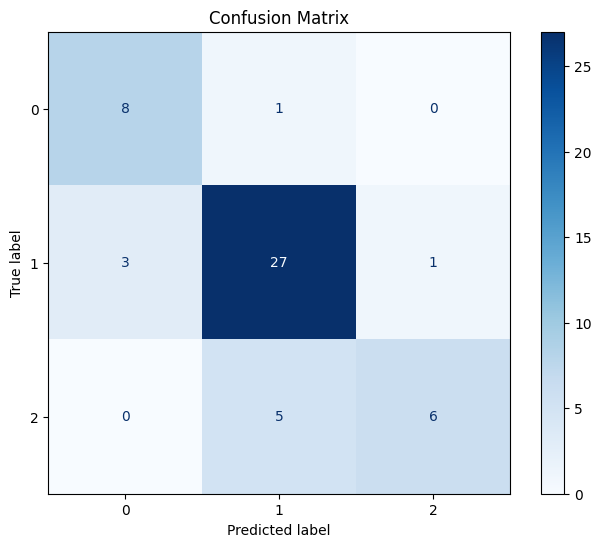

In [26]:
DT_grid_search_params = {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 9),
        "min_samples_split": range(2, 9),
        "min_samples_leaf": range(2, 9),
        "random_state": [54],
}

DT = Classifier(DecisionTreeClassifier(), DT_grid_search_params, feature_data.X_train, feature_data.y_train)
DT.run(feature_data.X_test, feature_data.y_test)

### Q23: Difference of Training between algorithms such as KNN, Logistic Regression and NN:

KNN is a memory-based algorithm that does not learn a specific model during training, whereas Logistic Regression and Neural Networks involve optimization of model parameters to learn a decision boundary. Logistic Regression is a linear model with interpretable coefficients, while Neural Networks can learn complex non-linear relationships but are more computationally intensive and require optimization techniques for training. The choice of algorithm depends on the data characteristics, interpretability requirements, and the complexity of the relationship between features and the target variable.

### Q24: One-Nearest-Neighbor:

The One Nearest Neighbor (1-NN) method is a simple and intuitive instance-based learning algorithm used for classification tasks. In 1-NN, the class label of a new data point is predicted based on the class of its nearest neighbor in the training dataset. Here is an overview of how the 1-NN method works:

1. Training Phase:
   - In the training phase of the 1-NN algorithm, the entire training dataset is stored without any specific model being learned. The training data consists of feature vectors and corresponding class labels.

2. Prediction Phase:
   - Given a new data point that needs to be classified, the 1-NN algorithm calculates the distances between the new data point and all data points in the training set. Various distance metrics like Euclidean distance, Manhattan distance, or other similarity measures can be used for this purpose.
   
   - The nearest neighbor to the new data point is identified based on the calculated distances. The class label of the nearest neighbor is then assigned to the new data point.

3. Classification:
   - The predicted class label of the new data point is determined by the majority class of its nearest neighbor in the training set. If the majority class of the nearest neighbor is a certain class, the new data point is classified into that class.

4. Algorithm Complexity:
   - The 1-NN algorithm is simple to implement and understand, as it directly relies on the similarity of data points to make predictions. However, it can be computationally expensive for large datasets, as it requires calculating distances to all training points for each prediction.

5. Key Considerations:
   - The choice of distance metric and the number of nearest neighbors (K) can affect the performance of the 1-NN algorithm. Different distance metrics may be more suitable for specific types of data.
   - The 1-NN algorithm is sensitive to outliers and noise in the data, as the prediction is solely based on the closest neighbor. Outliers can significantly impact the classification result.
   
   - While 1-NN can capture complex decision boundaries in the data, it may suffer from overfitting, especially in noisy datasets with a high dimensionality. It is important to consider the balance between model complexity and generalization.

Overall, the 1-NN algorithm is a straightforward and non-parametric approach to classification that can be effective for small to moderately sized datasets with clear decision boundaries. It offers a simple yet powerful way to make predictions based on the similarity between data points, making it a valuable tool in machine learning applications.


[Text(0.3680555555555556, 0.9285714285714286, 'x[2] <= 0.115\ngini = 0.57\nsamples = 404\nvalue = [86, 237, 81]'),
 Text(0.12037037037037036, 0.7857142857142857, 'x[2] <= 0.089\ngini = 0.298\nsamples = 66\nvalue = [54, 12, 0]'),
 Text(0.037037037037037035, 0.6428571428571429, 'x[1] <= 0.195\ngini = 0.095\nsamples = 40\nvalue = [38, 2, 0]'),
 Text(0.018518518518518517, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]'),
 Text(0.05555555555555555, 0.5, 'x[2] <= 0.056\ngini = 0.18\nsamples = 20\nvalue = [18, 2, 0]'),
 Text(0.037037037037037035, 0.35714285714285715, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.07407407407407407, 0.35714285714285715, 'x[0] <= 0.11\ngini = 0.32\nsamples = 10\nvalue = [8, 2, 0]'),
 Text(0.05555555555555555, 0.21428571428571427, 'x[2] <= 0.08\ngini = 0.219\nsamples = 8\nvalue = [7, 1, 0]'),
 Text(0.037037037037037035, 0.07142857142857142, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.07407407407407407, 0.07142857142857142, 'gini = 0.444\

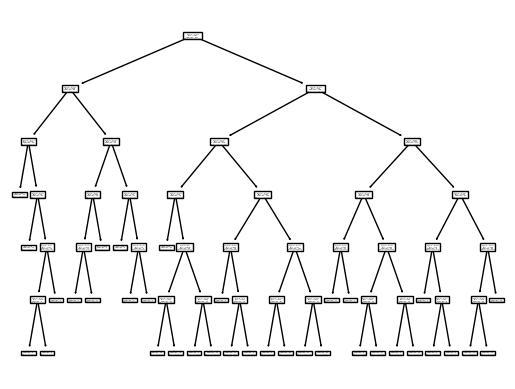

In [39]:
best_DT_classifier = DecisionTreeClassifier(** DT.best_params)
best_DT_classifier.fit(feature_data.X_train,feature_data.y_train)
y_pred_dt = best_DT_classifier.predict(feature_data.X_test)
plot_tree(best_DT_classifier)

### Q29: Overfitting/ Underfitting

### KNN

Initial model's test accuracy:  0.804
Best model's train accuracy score: 0.847
Best model's test score: 0.843
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10}


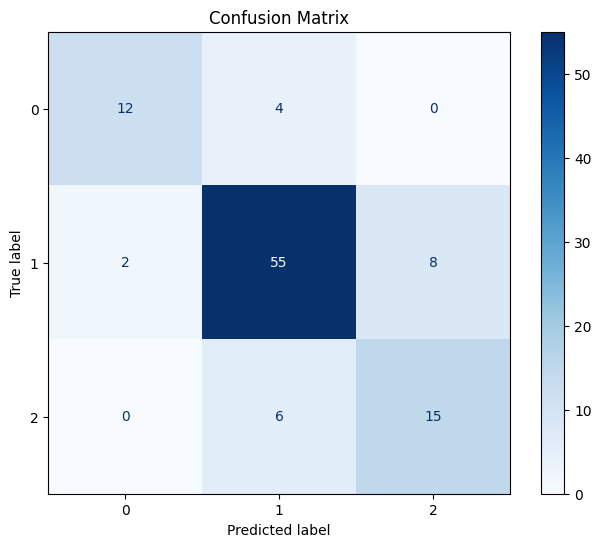

In [44]:
KNN_grid_search_params = {
        "n_neighbors": range(2,100),
        "metric": ["euclidean", "manhattan", "minkowski"]
}
KNN = Classifier(KNeighborsClassifier(), KNN_grid_search_params, feature_data.X_train, feature_data.y_train)
KNN.run(feature_data.X_test, feature_data.y_test)
y_pred_knn = KNN.predict(feature_data.X_test)

Initial model's test accuracy:  0.667
Best model's train accuracy score: 0.780
Best model's test score: 0.745
Best hyperparameters: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


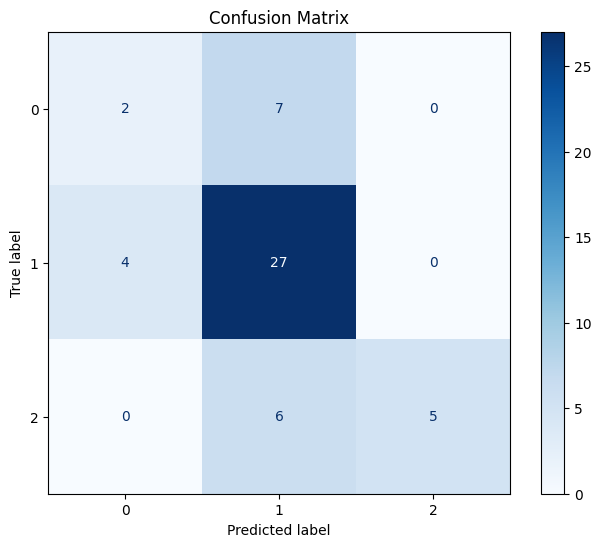

In [29]:
LR_grid_search_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] + list(range(11,30,1)),
    "penalty": ["l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
LR = Classifier(LogisticRegression(max_iter=500), LR_grid_search_params, feature_data.X_train, feature_data.y_train)
LR.run(feature_data.X_test, feature_data.y_test)

Initial model's test accuracy:  0.824
Best model's train accuracy score: 0.930
Best model's test score: 0.824
Best hyperparameters: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 15}


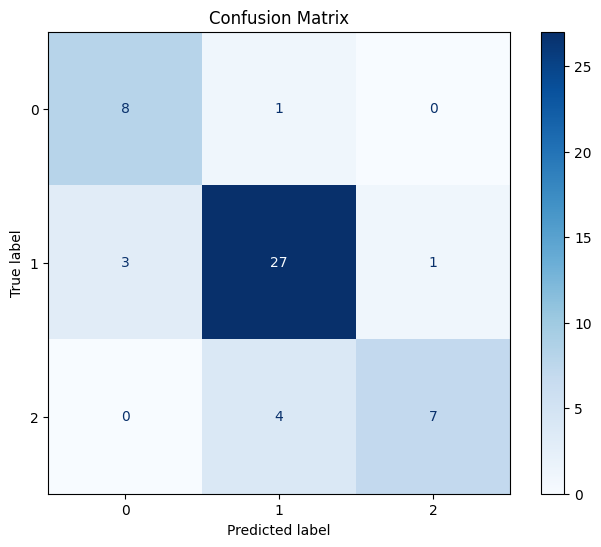

In [30]:
RF_grid_search_params = {
    'n_estimators': range(2,20),
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5, 10),
}
RF_classifier = RandomForestClassifier()
RF = Classifier(RF_classifier, RF_grid_search_params, feature_data.X_train, feature_data.y_train)
RF.run(feature_data.X_test, feature_data.y_test)

In [31]:
def hyper_param_comp(param_range, init_params, param):
    test_accs = []
    train_accs = []
    for i in param_range:
        init_params[param] = i
        classifier = RandomForestClassifier(criterion=init_params['criterion'], max_depth=init_params['max_depth'], n_estimators=init_params['n_estimators'])
        RF = Classifier(classifier, RF_grid_search_params, feature_data.X_train, feature_data.y_train)
        test_accs.append(RF.calc_accuracy(feature_data.X_test, feature_data.y_test))
        train_accs.append(RF.train_accuracy)

    plt.plot(param_range, test_accs, color='blue', label='test')
    plt.plot(param_range, train_accs, color='red', label='train')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")

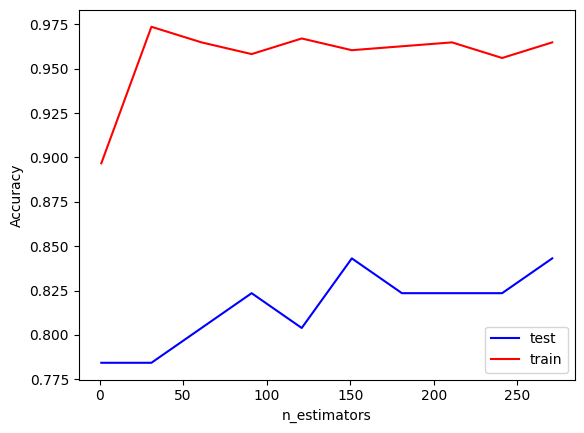

In [32]:
params = {
        'criterion': 'gini',
        'max_depth': 9,
        'n_estimators': 1,
}
hyper_param_comp(range(1, 300, 30), params, 'n_estimators')

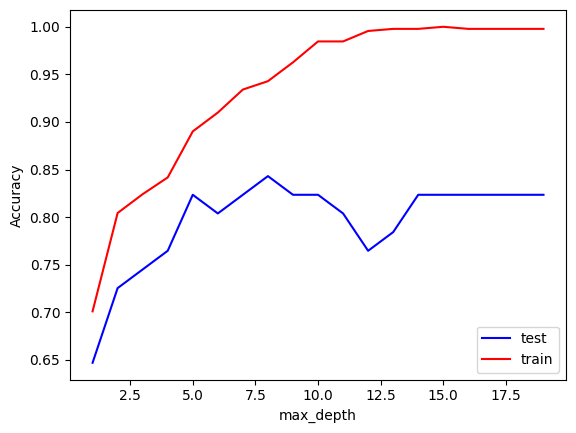

In [33]:
params = {
        'criterion': 'gini',
        'max_depth': 1,
        'n_estimators': 40,
}
hyper_param_comp(range(1, 20), params, 'max_depth')

### XGBoost


### Q38: what is XGBoost

XGBoost, short for Extreme Gradient Boosting, is an efficient and scalable implementation of gradient boosting framework. It works by sequentially adding weak learners (decision trees) to the ensemble, where each subsequent learner corrects the errors made by the previous ones. XGBoost optimizes a loss function by employing gradient descent algorithm and regularization techniques to prevent overfitting. It utilizes parallel computing and tree pruning algorithms to enhance computational speed and model accuracy. Overall, XGBoost is known for its high performance, versatility, and ability to handle large-scale datasets across various machine learning tasks such as classification, regression, and ranking.


### Q39: Gradient-Boosting
Gradient boosting is a popular machine learning technique for building predictive models. It involves combining multiple weak models, typically decision trees, to create a strong ensemble model. The basic idea is to fit a sequence of simple models to the residuals of the previous model, with the objective of minimizing a loss function. This process continues until a stopping criterion is met, such as a maximum number of iterations or a minimum improvement in the loss function.

*Boosting Tree vs Decision Tree:*

*Ensemble vs. Single Model:* Boosting tree is an ensemble learning algorithm that combines multiple weak learners (usually decision trees) into a strong learner, while decision tree is a single model that makes predictions based on a single tree-like structure.

*Iterative vs. Non-Iterative:* Boosting tree is an iterative algorithm that adds new trees to the ensemble iteratively, with each new tree attempting to correct the errors of the previous trees, while decision tree is a non-iterative algorithm that constructs a single tree-like structure based on the input features.

*Bias-Variance Tradeoff:* Boosting tree is designed to reduce both bias and variance, by combining multiple weak learners into a strong learner that can make accurate predictions on new, unseen data, while decision tree is prone to overfitting, especially when the tree is too deep or the number of training samples is too small.

*Hyperparameters:* Boosting tree has several hyperparameters that can be tuned to improve its performance, such as the learning rate, the number of trees in the ensemble, the maximum depth of each tree, and the minimum number of samples required to split a node, while decision tree has fewer hyperparameters, such as the maximum depth of the tree, the minimum number of samples required to split a node, and the splitting criterion.

*Interpretability:* Decision tree is more interpretable than boosting tree, because it produces a single tree-like structure that can be easily visualized and understood, while boosting tree produces an ensemble of trees that can be more difficult to interpret.

Initial model's test accuracy:  0.794
Best model's train accuracy score: 0.899
Best model's test score: 0.804
Best hyperparameters: {'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 170}


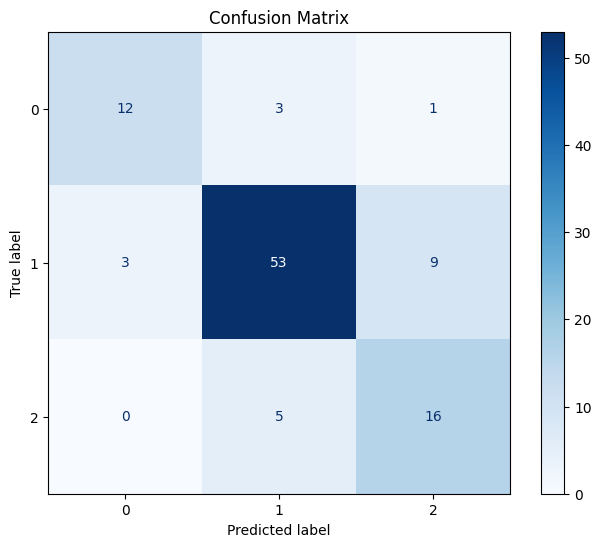

In [46]:
XGB_grid_search_params = {
    'max_depth': range(3,11,2),
    'learning_rate': [0.01, 0.03, 0.09, 0.1],
    'n_estimators': range(20,201,30),
    'gamma': [0, 1, 10, 100]
}
XGB = Classifier(XGBClassifier(), XGB_grid_search_params, feature_data.X_train, feature_data.y_train)
XGB.run(feature_data.X_test, feature_data.y_test)
y_pred_xgb = XGB.predict(feature_data.X_test)

## Ensemble Learning

### Q30: Why ensemble methods are useful

Ensemble methods like bagging, boosting, and stacking have become crucial in machine learning due to their ability to improve predictive accuracy, enhance robustness, reduce overfitting, offer flexibility across various tasks, and scale effectively to large datasets. By combining multiple models' predictions, ensemble methods mitigate individual model biases and errors, resulting in more stable and accurate predictions. Their versatility and applicability to diverse types of data, coupled with advancements in computational resources, make ensemble methods indispensable in modern machine learning workflows for tackling complex and challenging predictive modeling tasks.


### Q31: Boosting and Bagging
In bagging (Bootstrap Aggregating), multiple base learners are trained independently on different subsets of the training data, typically created through bootstrapping (sampling with replacement). The final prediction is made by averaging (for regression) or voting (for classification) the predictions of all base learners. Bagging aims to reduce variance and prevent overfitting by combining multiple models' predictions.

In contrast, boosting involves training multiple weak learners sequentially, with each subsequent learner focusing on the samples that the previous ones misclassified. The final prediction is a weighted sum of the predictions of all weak learners. Boosting aims to reduce bias and improve accuracy by iteratively correcting the errors made by earlier models. Unlike bagging, boosting assigns weights to training instances, emphasizing the importance of hard-to-classify examples, which can lead to a stronger overall learner.


### Q32: Random Forest
Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Each decision tree is trained on a random subset of the training data and a random subset of the features, typically chosen without replacement. This randomness helps to decorrelate the trees and reduce overfitting. During prediction, the Random Forest aggregates the predictions of all the individual trees to make the final prediction. This ensemble approach often results in more robust and accurate predictions compared to single decision trees.


### Q33: Bootstrapping in Random Forest
In Random Forest, bootstrapping is a technique used to create multiple subsets of the original dataset by randomly sampling with replacement. Each subset, called a bootstrap sample, has the same size as the original dataset but may contain duplicate instances and may exclude some original instances. These bootstrap samples are then used to train individual decision trees within the Random Forest ensemble.

Bootstrapping helps introduce diversity among the decision trees because each tree is trained on a slightly different subset of the data. This diversity is beneficial because it helps reduce overfitting and improves the overall performance of the Random Forest model. Additionally, bootstrapping allows some instances to be left out of each bootstrap sample, which can be used as "out-of-bag" (OOB) samples for estimating the model's performance without the need for a separate validation set.


### Q34: Number of Decision Tress in Random Forest
The number of decision trees in a Random Forest significantly influences the model's performance. Generally, increasing the number of trees can lead to better performance up to a certain point, after which the improvement may plateau or even decrease due to overfitting.

The optimal number of trees in a Random Forest is typically determined empirically through experimentation and validation. It depends on factors such as the complexity of the dataset, the level of noise, and computational resources. In practice, a common range for the number of trees in a Random Forest is between 10 to 200.

### Q35: When we should use Random Forest
Random Forest is not suitable in scenarios where interpretability is paramount, such as when the model's decision-making process needs to be transparent and easily understandable. Since Random Forest combines multiple decision trees, interpreting the individual trees' decisions becomes more challenging, making it less suitable for applications where interpretability is crucial, such as in legal or medical domains.

On the other hand, Random Forest is highly recommended when dealing with complex datasets with high-dimensional features or when robust performance is required. It excels in handling noisy data, mitigating overfitting, and providing reliable predictions, making it a preferred choice in various real-world applications, including classification and regression tasks in fields like finance, marketing, and bioinformatics. Additionally, its ability to handle large datasets efficiently and its scalability make it well-suited for big data analytics and machine learning tasks in industries with vast amounts of data.

### Q36: Effect of Random Forest on Variance
Random Forest can help reduce the variance of a model. By combining multiple decision trees trained on different subsets of the data, Random Forest averages out the predictions of individual trees, leading to a smoother overall prediction. This averaging process tends to reduce the variance of the model compared to a single decision tree. As a result, Random Forests are less prone to overfitting, which can occur when a model captures noise or idiosyncrasies in the training data rather than learning the underlying patterns. Overall, Random Forests can provide more stable and reliable predictions by reducing variance, making them a popular choice in machine learning tasks where robustness is important.


### Q37: Random Forest Hyperparameters
some of the most important hyperparameters of Random Forest are:

n_estimators: The number of decision trees in the Random Forest. A larger value of n_estimators can improve the performance of the model, but may also increase the training time and memory usage.

criterion: The function used to measure the quality of a split. The default is 'gini', which uses the Gini impurity measure. Another option is 'entropy', which uses the information gain measure.

max_depth: The maximum depth of the decision trees in the Random Forest. A larger value of max_depth can capture more complex patterns in the data, but may also lead to overfitting. A smaller value of max_depth can help prevent overfitting but may also lead to underfitting.

min_samples_split: The minimum number of samples required to split an internal node. A larger value of min_samples_split can help prevent overfitting but may also lead to underfitting.

min_samples_leaf: The minimum number of samples required to be at a leaf node. A larger value of min_samples_leaf can help prevent overfitting but may also lead to underfitting.

max_features: The maximum number of features to consider when making a split. The default is 'auto', which uses the square root of the number of features. Another option is 'sqrt', which uses the square root of the number of features.

class_weight: The weight function used in the classification. The default is None, which means all classes have equal weight. Another option is 'balanced', which automatically adjusts the weights based on the number of samples in each class.

random_state: Controls the randomness of the estimator. If an integer is given, the randomness will be deterministic and the results will be reproducible.

### SVM(Support Vector Machine)



### Q40.3: Random vs Grid search
Considering our dataset's size, Grid Search is preferable for efficiently finding optimal hyperparameters within a short timeframe, while Random Search is more suitable for larger datasets.

In [35]:
class SVM:
    def __init__(self,kernel, X_train, y_train,X_test, y_test):
        self.kernel = kernel
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test= y_test
        self.model = SVC(kernel=self.kernel).fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)

    def grid_search(self, param_grid):
        grid_search = GridSearchCV(estimator=self.model, param_grid=param_grid, scoring='accuracy', cv=5)
        grid_search.fit(self.X_train, self.y_train)
        print(f'Best parameters with {self.kernel} kernel in grid search:', grid_search.best_params_)

    def random_search(self, param_dist, n_iter=10, random_state=None):
        random_search = RandomizedSearchCV(estimator=self.model, param_distributions=param_dist, n_iter=n_iter, scoring='accuracy', cv=5, random_state=random_state)
        random_search.fit(self.X_train, self.y_train)
        print(f'Best parameters with {self.kernel} kernel in random search:', random_search.best_params_)

    def calc_accuracy(self):
        return self.model.score(self.X_test, self.y_test)
    def calc_recall(self):
        return recall_score(self.y_test, self.y_pred, average='weighted')
    def calc_f1(self):
        return f1_score(self.y_test, self.y_pred, average='weighted')
    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.y_test, self.y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=self.model.classes_,
                    yticklabels=self.model.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {self.kernel} Kernel')
        plt.show()
    def run(self):
        print(f'Accuracy with {self.kernel} kernel is',self.calc_accuracy())
        print(f'Recall with {self.kernel} kernel is',self.calc_recall())
        print(f'F1 score with {self.kernel} kernel is',self.calc_f1())
        self.plot_confusion_matrix()


Best parameters with linear kernel in grid search: {'C': 10}
Best parameters with rbf kernel in grid search: {'C': 1000, 'gamma': 0.001}
Best parameters with linear kernel in random search: {'C': 18.182636363636366}
Best parameters with rbf kernel in random search: {'gamma': 0.09091, 'C': 535.4}
Accuracy with rbf kernel is 0.7549019607843137
Recall with rbf kernel is 0.7549019607843137
F1 score with rbf kernel is 0.7523215058519162


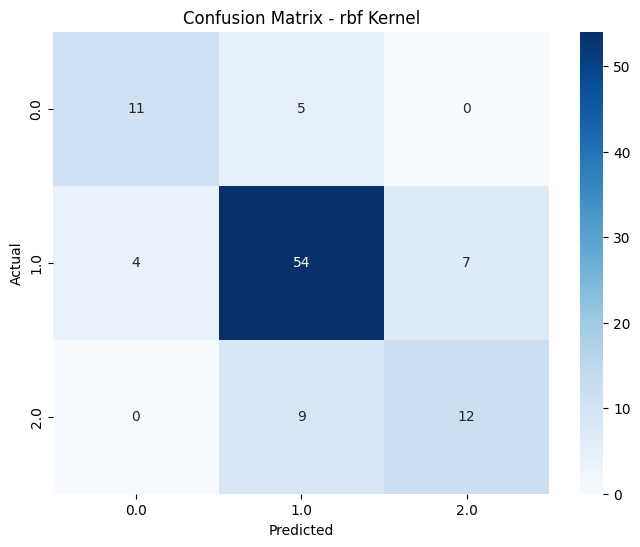

Accuracy with linear kernel is 0.7647058823529411
Recall with linear kernel is 0.7647058823529411
F1 score with linear kernel is 0.7508276037687802


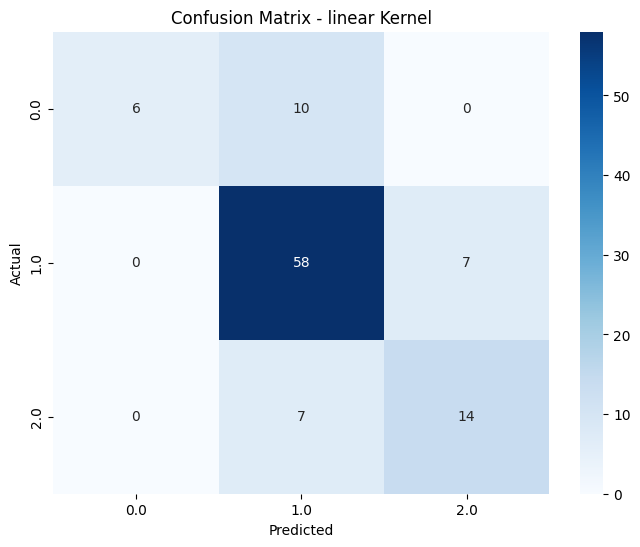

In [36]:
feature_data.split_for_svm('MEDV','label')
rbf_SVM = SVM('rbf', feature_data.X_train, feature_data.y_train, feature_data.X_test, feature_data.y_test)
linear_SVM = SVM('linear', feature_data.X_train, feature_data.y_train, feature_data.X_test, feature_data.y_test)
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 0.00001]}
param_dist_linear = {'C': np.linspace(0.001, 100, 100)}
param_dist_rbf = {'C': np.linspace(0.1, 1000, 100), 'gamma': np.linspace(0.00001, 0.1, 100)}
linear_SVM.grid_search(param_grid_linear)
rbf_SVM.grid_search(param_grid_rbf)
linear_SVM.random_search(param_dist_linear, n_iter=20, random_state=42)
rbf_SVM.random_search(param_dist_rbf, n_iter=20, random_state=42)
rbf_SVM.run()
linear_SVM.run()


### Model Evaluation

In [56]:
report_dt = classification_report(feature_data.y_test, y_pred_dt)
report_knn = classification_report(feature_data.y_test, y_pred_knn)
report_xgb = classification_report(feature_data.y_test, y_pred_xgb)

print("Decision Tree Classification Report:")
print(report_dt)
print("\nK-Nearest Neighbors Classification Report:")
print(report_knn)
print("\nXGBoost Classification Report:")
print(report_xgb)

accuracy_dt = accuracy_score(feature_data.y_test, y_pred_dt)
accuracy_knn = accuracy_score(feature_data.y_test, y_pred_knn)
accuracy_xgb = accuracy_score(feature_data.y_test, y_pred_xgb)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67        16
         1.0       0.85      0.80      0.83        65
         2.0       0.71      0.81      0.76        21

    accuracy                           0.78       102
   macro avg       0.74      0.77      0.75       102
weighted avg       0.79      0.78      0.79       102


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80        16
         1.0       0.85      0.85      0.85        65
         2.0       0.65      0.71      0.68        21

    accuracy                           0.80       102
   macro avg       0.79      0.77      0.78       102
weighted avg       0.81      0.80      0.81       102


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        16
         1.0    